# **Organisation nationale de lutte contre le faux-monnayage**
# Détection de faux billets
# Partie 2 : Création des modèles

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import sklearn as sk
import scipy as sp
import pca as pca
import numpy 

In [2]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import learning_curve
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [3]:
# Sauvegarde des modèles
from pickle import dump

In [4]:
# Formatage 

#separateur milliers
pd.options.display.float_format = '{:,.2f}'.format

# Couleurs
red_a400 = '#ff1744'
indigo_a100 = '#8c9eff'
indigo_a400 = '#3d5afe'
indigo_a700 = '#304ffe'
bluegrey_900 = '#263238'
teal_a400 = '#1de9b6'
purple_a400 = '#d500f9'
yellow_a400 = '#ffea00'
bluegrey_900 = '#263238'
palette_5 = [teal_a400, indigo_a400, red_a400, yellow_a400, purple_a400]


# Importation des fichiers **df_final & billets_production**

In [5]:
df_final_1 = pd.read_csv('./Data/df_final.csv', delimiter=",")
df_final_1.head()

,Unnamed: 0,is_genuine,check,diagonal,height_left,height_right,margin_low,margin_up,length
0,0,True,1,-0.49,2.77,3.16,0.06,-1.13,0.17
1,1,True,1,-1.63,-2.24,-0.80,-1.08,-0.70,0.47
2,2,True,1,2.40,1.50,-1.29,-0.13,-0.91,0.55
3,3,True,1,-1.96,-0.40,0.06,-1.31,-0.61,0.95
4,4,True,1,-0.75,0.84,-1.41,-0.67,1.42,-0.16


In [6]:
df_final_1 = df_final_1.rename(columns={'Unnamed: 0':"id"})
df_final_1 = df_final_1[['check', 'is_genuine','diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up',
       'length', 'id']]

In [7]:
df_final = df_final_1.copy()
df_final.head()

,check,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,1,True,-0.49,2.77,3.16,0.06,-1.13,0.17,0
1,1,True,-1.63,-2.24,-0.80,-1.08,-0.70,0.47,1
2,1,True,2.40,1.50,-1.29,-0.13,-0.91,0.55,2
3,1,True,-1.96,-0.40,0.06,-1.31,-0.61,0.95,3
4,1,True,-0.75,0.84,-1.41,-0.67,1.42,-0.16,4


In [8]:
billets_production = pd.read_csv('./Data/billets_production.csv', delimiter=",")
billets_production.head()

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5


In [9]:


features = df_final.loc[:, 'diagonal':'length'].columns

y = df_final['is_genuine']

X = df_final.loc[:, 'diagonal':'length']

X_scaled = df_final.loc[:, 'diagonal':'length']

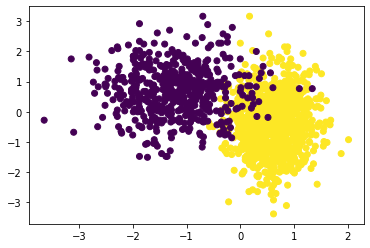

In [10]:
# Visualisation des points
plt.scatter(X["length"],X["height_right"],c=y)

In [11]:
features

Index(['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up',
       'length'],
      dtype='object')

## reFormatage

In [12]:
df_final = df_final[['is_genuine','check','diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up','length', 'id']]
df_final


,is_genuine,check,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,True,1,-0.49,2.77,3.16,0.06,-1.13,0.17,0
1,True,1,-1.63,-2.24,-0.80,-1.08,-0.70,0.47,1
2,True,1,2.40,1.50,-1.29,-0.13,-0.91,0.55,2
3,True,1,-1.96,-0.40,0.06,-1.31,-0.61,0.95,3
4,True,1,-0.75,0.84,-1.41,-0.67,1.42,-0.16,4
...,...,...,...,...,...,...,...,...,...
1495,False,0,-0.68,1.17,0.77,-0.10,-0.27,-1.60,1495
1496,False,0,0.76,2.01,1.60,1.19,0.94,-1.96,1496
1497,False,0,-0.52,-0.07,0.61,1.56,0.90,-0.84,1497
1498,False,0,0.33,0.84,0.43,1.04,1.33,-0.49,1498


# Train Test Split

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
df_final

,is_genuine,check,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,True,1,-0.49,2.77,3.16,0.06,-1.13,0.17,0
1,True,1,-1.63,-2.24,-0.80,-1.08,-0.70,0.47,1
2,True,1,2.40,1.50,-1.29,-0.13,-0.91,0.55,2
3,True,1,-1.96,-0.40,0.06,-1.31,-0.61,0.95,3
4,True,1,-0.75,0.84,-1.41,-0.67,1.42,-0.16,4
...,...,...,...,...,...,...,...,...,...
1495,False,0,-0.68,1.17,0.77,-0.10,-0.27,-1.60,1495
1496,False,0,0.76,2.01,1.60,1.19,0.94,-1.96,1496
1497,False,0,-0.52,-0.07,0.61,1.56,0.90,-0.84,1497
1498,False,0,0.33,0.84,0.43,1.04,1.33,-0.49,1498


In [15]:
def evaluate(df_final):
    
    X = df_final.loc[:, 'diagonal':'length']# Variables explicatives 
    y = df_final["check"] # bool variable qualitative
    y = np.ravel(np.array(y),'F')
    return (X, y)

In [16]:
X, y = evaluate(df_final)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#y_test = np.array(y_test)

In [17]:
X_train.merge(pd.DataFrame(y_train), left_index=True, right_index=True).sample(20)

,diagonal,height_left,height_right,margin_low,margin_up,length,0
360,-1.14,-1.00,0.28,-0.29,-0.96,0.09,1
489,0.07,1.10,-1.48,-0.44,0.21,0.28,1
710,0.23,-0.20,-0.19,-0.08,-0.35,-0.03,1
1125,0.27,0.77,-0.15,1.10,1.46,-0.67,0
982,-1.73,1.64,-1.54,-0.66,-1.43,0.39,1
1006,-1.08,0.07,1.01,0.19,-0.22,-2.03,1
136,0.33,0.54,-1.01,-0.14,0.30,1.16,1
971,-1.27,-1.50,0.43,-0.95,-0.91,0.40,1
750,-0.88,0.07,-0.58,-0.93,0.25,1.01,1
232,-2.03,0.77,0.43,-1.08,0.21,1.41,0


In [18]:
df_final.loc[1078]

is_genuine      False
check               0
diagonal         0.82
height_left      1.24
height_right     1.10
margin_low       1.21
margin_up        1.16
length           0.36
id               1078
Name: 1078, dtype: object

## Analyse du split

In [19]:
#Comptage des modalité de y
print(pd.DataFrame(y_test).value_counts())
print("Train set:", X_train.shape)
print("Test set:", X_test.shape)

1    190
0    110
dtype: int64
Train set: (1200, 6)
Test set: (300, 6)


In [20]:
index_X_train = pd.DataFrame(X_train).index

In [21]:
# Calcul de Répartition de l'authenticité des billets pour X_train"


index_X_train = X_train.index
X_train_balance=df_final[~df_final.index.isin(index_X_train)]


# Calcul de Répartition de l'authenticité des billets pour X_test
index_X_test = X_test.index
X_test_balance=df_final[~df_final.index.isin(index_X_test)]

# Resampling du X_train

In [23]:

import random


In [24]:
# Create function and apply for random oversampling - binary
def overSamplingBinary(X, y, targetBalance = 0.5):
    # define majority/minority classes based on the inputted
    # target column (y)
    yMajority = y.value_counts().idxmax()
    yMinority = y.value_counts().idxmin()
    # We next create separate majority and minority dataframes which are converted
    # to lists
    X['is_genuine'] = y
    majority = X[X['is_genuine'] == yMajority].values.tolist()
    minority = X[X['is_genuine'] == yMinority].values.tolist()
    # Next we implement a while loop to keep randomly selecting rows
    # from the minority data until the target balance between minority
    # and majority is achieved
    enlargedMinority = []
    while len(enlargedMinority)/(len(majority) + len(enlargedMinority)) < targetBalance:
        randomValue = random.choice(minority)
        enlargedMinority.append(randomValue)
    # Take the original column names
    columnNames = list(X.columns)
    # Create a new dataset by comining target and features
    newDataset = enlargedMinority + majority
    # combine this back as a df with original column names
    # for features
    newDataset = pd.DataFrame(newDataset, columns = columnNames)
    return newDataset

In [25]:
y= pd.DataFrame(y)
df_resampled  = overSamplingBinary(X, y, targetBalance = 0.5)
print("Shape Resampled_df:", df_resampled.shape)
print("Shape df_final:", df_final.shape)
df_resampled.head()

Shape Resampled_df: (2000, 7)
Shape df_final: (1500, 9)


,diagonal,height_left,height_right,margin_low,margin_up,length,is_genuine
0,-1.93,-1.00,0.80,0.74,0.81,-1.95,0.00
1,-1.54,1.30,1.47,0.90,0.90,-1.41,0.00
2,0.79,1.40,0.31,0.50,1.85,-1.69,0.00
3,0.53,1.17,0.03,0.34,1.25,-1.33,0.00
4,-0.06,1.14,0.67,1.34,1.33,-0.85,0.00


In [26]:
df_resampled = df_resampled.reset_index()
df_resampled = df_resampled.rename(columns={"index":"id", "is_genuine":"check"})
df_resampled

,id,diagonal,height_left,height_right,margin_low,margin_up,length,check
0,0,-1.93,-1.00,0.80,0.74,0.81,-1.95,0.00
1,1,-1.54,1.30,1.47,0.90,0.90,-1.41,0.00
2,2,0.79,1.40,0.31,0.50,1.85,-1.69,0.00
3,3,0.53,1.17,0.03,0.34,1.25,-1.33,0.00
4,4,-0.06,1.14,0.67,1.34,1.33,-0.85,0.00
...,...,...,...,...,...,...,...,...
1995,1995,-0.98,-0.37,-1.38,-0.34,-1.39,0.60,1.00
1996,1996,0.66,-1.03,-0.95,-0.28,-1.86,0.95,1.00
1997,1997,-0.58,-2.17,0.92,-0.38,-0.35,1.25,1.00
1998,1998,-1.70,-0.23,-0.00,-1.22,-1.13,0.61,1.00


In [27]:
X_resampled, y_resampled = evaluate(df_resampled)
Xresampled, X_test_resampled, yresampled, y_test_resampled = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42,shuffle=True)

In [28]:
y_resampled.shape

(2000,)

# Modélisation

In [29]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import learning_curve
from sklearn.metrics import roc_curve,plot_roc_curve, balanced_accuracy_score
from sklearn.metrics import mean_absolute_error

# Mes df: 
## df_final &  df_resampled

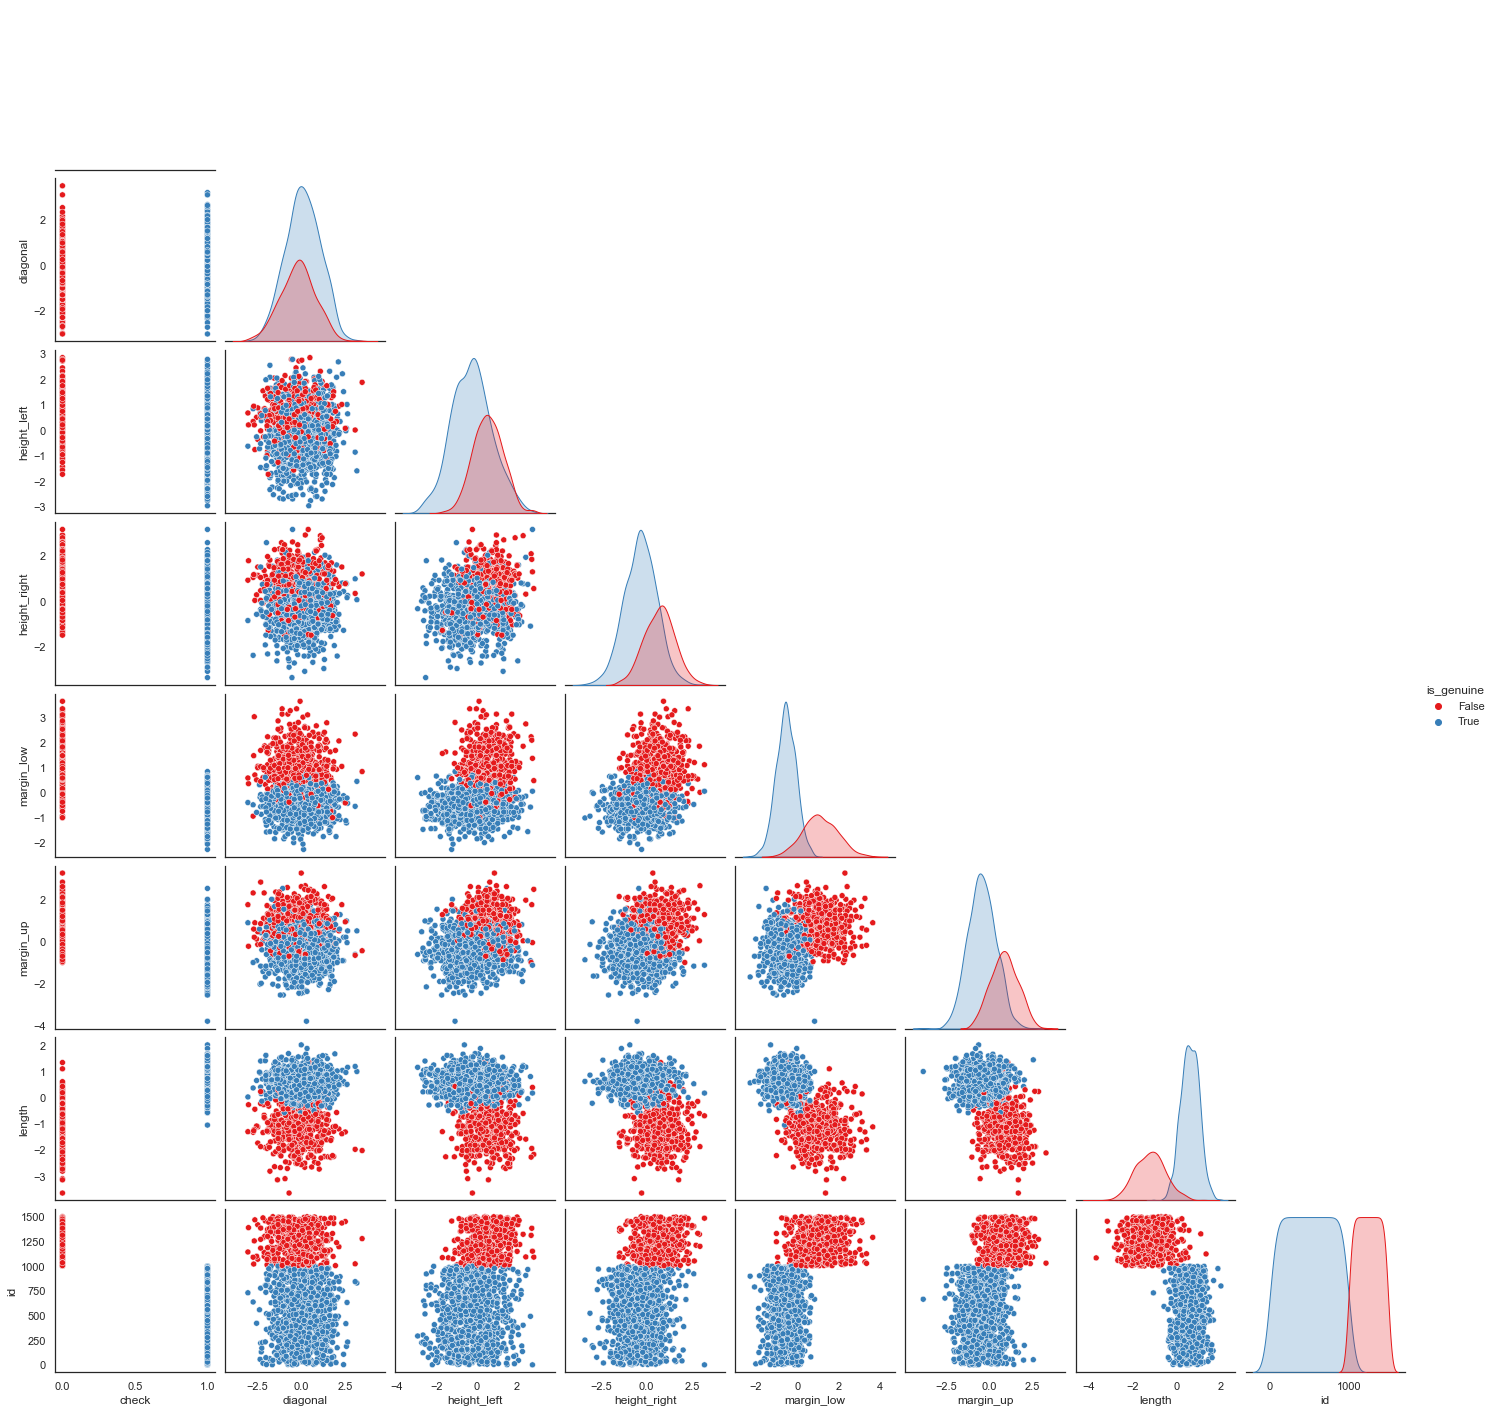

In [30]:
# schuffle neutralise la hierarchie de 0 et 1
sns.pairplot(df_final.sample(n=len(df_final), random_state=0),hue='is_genuine',palette='Set1',corner=True)


In [31]:
y_true = np.array(df_final['is_genuine'])

In [32]:
df_final.index = df_final['check']


In [33]:
df_resampled

,id,diagonal,height_left,height_right,margin_low,margin_up,length,check
0,0,-1.93,-1.00,0.80,0.74,0.81,-1.95,0.00
1,1,-1.54,1.30,1.47,0.90,0.90,-1.41,0.00
2,2,0.79,1.40,0.31,0.50,1.85,-1.69,0.00
3,3,0.53,1.17,0.03,0.34,1.25,-1.33,0.00
4,4,-0.06,1.14,0.67,1.34,1.33,-0.85,0.00
...,...,...,...,...,...,...,...,...
1995,1995,-0.98,-0.37,-1.38,-0.34,-1.39,0.60,1.00
1996,1996,0.66,-1.03,-0.95,-0.28,-1.86,0.95,1.00
1997,1997,-0.58,-2.17,0.92,-0.38,-0.35,1.25,1.00
1998,1998,-1.70,-0.23,-0.00,-1.22,-1.13,0.61,1.00


In [34]:
df_resampled.index = df_resampled['check']


# ACP

In [35]:
from sklearn.svm import SVC
import pca as PCA


In [36]:
from sklearn import decomposition
from sklearn import preprocessing

from matplotlib.collections import LineCollection
import numpy as np
from scipy.cluster.hierarchy import dendrogram

def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(7,6))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)
        
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig = plt.figure(figsize=(7,6))
        
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)



    
    
    
 

Mon ACP


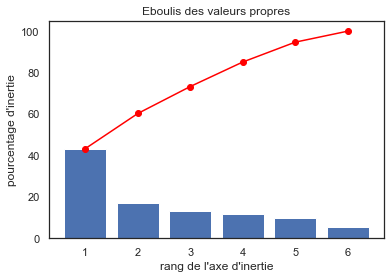

Explication de la variance observée dans les données,
la 1ère explique: 43.29%
la 2ème explique: 16.96%
la 3ème explique: 13.03%
la 4ème explique: 11.83%



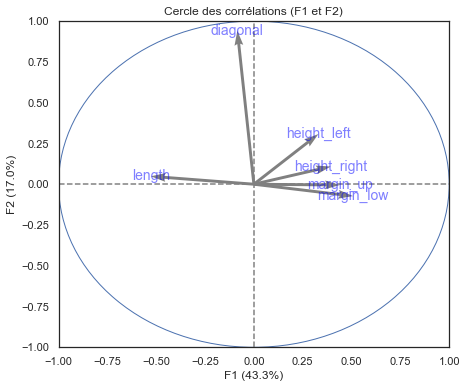

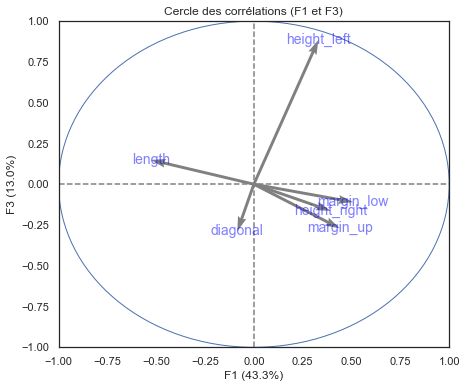

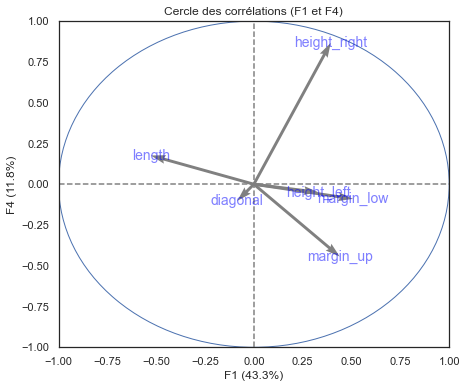

Les Marges semblent etre corrélées



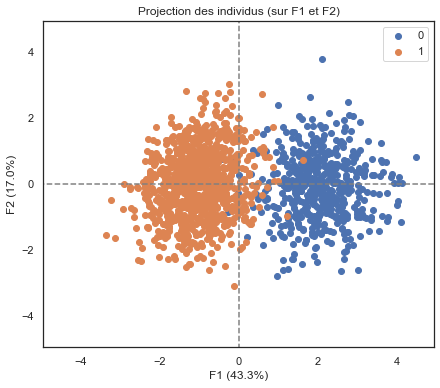

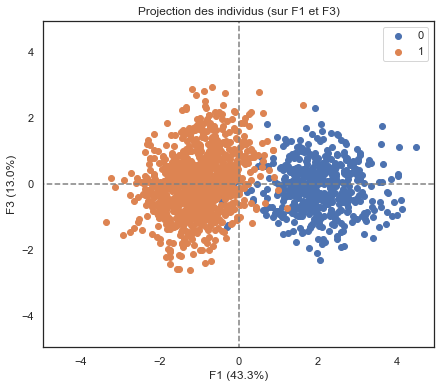

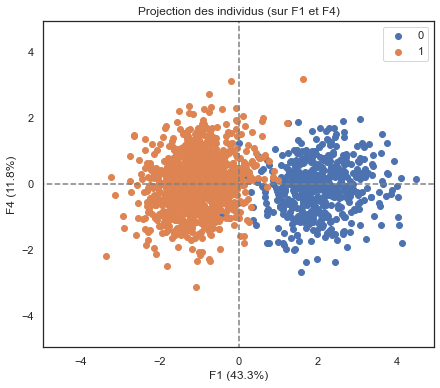

In [37]:
print("Mon ACP")

# choix du nombre de composantes à calculer
n_comp = 6

#df.index=df['is_genuine']





features = df_final.loc[:, 'diagonal':'length'].columns

y = df_final['is_genuine']

X = df_final.loc[:, 'diagonal':'length']

X_scaled = df_final.loc[:, 'diagonal':'length']

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X)

# Eboulis des valeurs propres
display_scree_plot(pca)
plt.show()
print("""Explication de la variance observée dans les données,
la 1ère explique: {:.2%}""".format(pca.explained_variance_ratio_[0]))
print("la 2ème explique: {:.2%}""".format(pca.explained_variance_ratio_[1]))
print("la 3ème explique: {:.2%}""".format(pca.explained_variance_ratio_[2]))
print("la 4ème explique: {:.2%}""".format(pca.explained_variance_ratio_[3]))

print("")



# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1),(0,2),(0,3)], labels = np.array(features))
plt.show()
print("Les Marges semblent etre corrélées")
print("")



# Projection des individus
X_projected = pca.transform(X)#ici
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(0,2),(0,3)],illustrative_var=df_final.index)

# Kmeans 
   

In [39]:
from sklearn.cluster import KMeans
from sklearn import cluster

In [210]:
data_kmeans = df_final_1.copy()
data_kmeans = data_kmeans.set_index("is_genuine") 


In [45]:
#k-means sur les données centrées et réduites
from sklearn import cluster
km_fit = KMeans(n_clusters=2, random_state=42)
km_fit.fit(X_projected)

KMeans(n_clusters=2, random_state=42)

In [46]:
# Sauvegarde du modèle Kmeans
dump(km_fit, open('./Assets/km_fit.pkl', 'wb'))

In [47]:
# Récupération des clusters attribués à chaque individu
clusters = km_fit.labels_

In [48]:
clusters.shape

(1500,)

In [49]:
X.shape

(1500, 6)

In [50]:
print('Test score:',km_fit.score(X.values))

Test score: -8771.718197216747


In [51]:
confusion_matrix_kmeans = pd.crosstab(clusters, y_true)
confusion_matrix_kmeans

col_0,False,True
row_0,,
0,486,10
1,14,990


In [52]:
# Matrice
print("Résultat : Kmeans")
print("")
print('Test score:',km_fit.score(X_projected))
print("")
print("Confusion Matrix:")
print("")
confusion_matrix_kmeans = pd.crosstab(clusters, y_true)
print(confusion_matrix_kmeans)
print("")
# Affichage et lectude de la matruice de confusion
tn = confusion_matrix_kmeans.iloc[0][0]
fn = confusion_matrix_kmeans.iloc[1][0]
fp = confusion_matrix_kmeans.iloc[0][1]
tp = confusion_matrix_kmeans.iloc[1][1]
TPR = tp/(tp+fn) # True Positive Rate (TPR) # = SENSIBILITE
FPR = fp/(tn+fp) # False Positive Rate (FPR)
TNR = tn/(tn+fp) # True Negative Rate (TNR) # = SPECIFICITE
FNR = fn/(tp+fn) # False Negative Rate (FNR)
print("Vrai négatif:",tn,", Vrai positif:", tp)
print("Faux négatif:",fn,", Faux positif:",fp )
print("")
print("True Positive Rate: {:.2%}, ".format(TPR), "False Positive Rate {:.2%}, ".format(FPR))
print("True Negative Rate: {:.2%}, ".format(TNR), "False Negative Rate: {:.2%}, ".format(FNR))
print("")
print("Score Kmeans : {:.2%}".format(1-((fn + fp)/len(df_final))))

MSE = metrics.mean_squared_error(y_true, clusters)
rmse_train = (np.sqrt(mean_squared_error(y_true, clusters)))
r2_pred = r2_score(y_true, clusters)


print("Evaluation du modèle")
print('Coefficient de determination')
print('')
print("L'erreur quadratique moyenne (rmse) est {}".format(rmse_train))
print('le score R2 est {}'.format(r2_pred))
print('\n')

Résultat : Kmeans

Test score: -5805.046913945745

Confusion Matrix:

col_0  False  True
row_0             
0        486    10
1         14   990

Vrai négatif: 486 , Vrai positif: 990
Faux négatif: 14 , Faux positif: 10

True Positive Rate: 98.61%,  False Positive Rate 2.02%, 
True Negative Rate: 97.98%,  False Negative Rate: 1.39%, 

Score Kmeans : 98.40%
Evaluation du modèle
Coefficient de determination

L'erreur quadratique moyenne (rmse) est 0.12649110640673517
le score R2 est 0.928




In [53]:
# Mes centroides
km_fit.cluster_centers_[:,0]

array([ 2.06622699, -1.02076552])

In [54]:
data_kmeans = data_kmeans.reset_index()
Cluster_kmeans = data_kmeans[["id","is_genuine"]].merge(pd.DataFrame(clusters), left_index=True, right_index=True)
Cluster_kmeans = Cluster_kmeans.rename(columns={0:"Cluster"})
Cluster_kmeans

,id,is_genuine,Cluster
0,0,True,0
1,1,True,1
2,2,True,1
3,3,True,1
4,4,True,1
...,...,...,...
1495,1495,False,0
1496,1496,False,0
1497,1497,False,0
1498,1498,False,0


In [55]:
Cluster_kmeans.groupby("is_genuine").agg({"id":"count"})

,id
is_genuine,
False,500
True,1000


In [56]:

Poid_cluster_kmeans = Cluster_kmeans.groupby("Cluster").agg({"id":"count"})
Poid_cluster_kmeans

,id
Cluster,
0,496
1,1004


In [57]:
dict_predictions = ({0:"False",1:"True"})
dict_predictions

{0: 'False', 1: 'True'}

In [58]:
# Moyennes par gruope
variables_means = Cluster_kmeans.groupby(clusters)
#variables_means = Cluster_kmeans.groupby(km_fit.labels_)

In [59]:
# Effectif par classe
variables_means.size()

0     496
1    1004
dtype: int64

In [60]:
# Moyenne par classe
variables_means.mean().T

,0,1
id,"1,236.48",508.92
is_genuine,0.02,0.99
Cluster,0.00,1.00


In [61]:
km_fit.transform(X_projected)

array([[4.23447058, 4.80378926],
       [4.72397346, 2.7166848 ],
       [4.40316362, 3.12905418],
       ...,
       [0.9206872 , 3.09968808],
       [1.07577312, 2.95392574],
       [2.0279219 , 2.7373052 ]])

In [62]:
#distances aux centres de classes des observations OKOKOK
results_kmean = pd.DataFrame(km_fit.transform(X_projected))
results_kmean = results_kmean.rename(columns={0:"PC1",1:"PC2"})
results_kmean

,PC1,PC2
0,4.23,4.80
1,4.72,2.72
2,4.40,3.13
3,4.15,2.27
4,3.08,2.66
...,...,...
1495,1.87,3.00
1496,2.08,4.57
1497,0.92,3.10
1498,1.08,2.95


In [63]:
Cluster_groupe_Kmeans_results = Cluster_kmeans.merge(results_kmean, left_index=True, right_index=True)
Cluster_groupe_Kmeans_results 
#Kmeans = Cluster_groupe_Kmeans_results[['Pays', 'Cluster',0,1,2]]
#Kmeans

,id,is_genuine,Cluster,PC1,PC2
0,0,True,0,4.23,4.80
1,1,True,1,4.72,2.72
2,2,True,1,4.40,3.13
3,3,True,1,4.15,2.27
4,4,True,1,3.08,2.66
...,...,...,...,...,...
1495,1495,False,0,1.87,3.00
1496,1496,False,0,2.08,4.57
1497,1497,False,0,0.92,3.10
1498,1498,False,0,1.08,2.95


In [65]:
# Moyenne par cluster de chaque composante(centroïdes)
centroides = Cluster_groupe_Kmeans_results.groupby(['Cluster']).mean(numeric_only=True)
centroides['Cluster'] = 'centroïde'
centroides['is_genuine_b'] = 'centroïde'
centroides

,id,is_genuine,PC1,PC2,Cluster,is_genuine_b
Cluster,,,,,,
0,"1,236.48",0.02,1.92,3.63,centroïde,centroïde
1,508.92,0.99,3.61,1.85,centroïde,centroïde


In [66]:
centroides = centroides.rename(columns={"is_genuine_b":"is_genuine"})

In [67]:

centroides = centroides[['id', 'Cluster', "PC1","PC2"]]

In [68]:
# Jointure des centroïdes sur la dataframe des 2 composantes
Cluster_groupe_Kmeans_results_centroides = pd.concat([Cluster_groupe_Kmeans_results, centroides])
Cluster_groupe_Kmeans_results_centroides = Cluster_groupe_Kmeans_results_centroides.reset_index()
Cluster_groupe_Kmeans_results_centroides

,index,id,is_genuine,Cluster,PC1,PC2
0,0,0.00,True,0,4.23,4.80
1,1,1.00,True,1,4.72,2.72
2,2,2.00,True,1,4.40,3.13
3,3,3.00,True,1,4.15,2.27
4,4,4.00,True,1,3.08,2.66
...,...,...,...,...,...,...
1497,1497,"1,497.00",False,0,0.92,3.10
1498,1498,"1,498.00",False,0,1.08,2.95
1499,1499,"1,499.00",False,0,2.03,2.74
1500,0,"1,236.48",NaN,centroïde,1.92,3.63


In [69]:
Cluster_groupe_Kmeans_results_centroides = Cluster_groupe_Kmeans_results_centroides[['Cluster', 'PC1', 'PC2']]
Cluster_groupe_Kmeans_results_centroides

,Cluster,PC1,PC2
0,0,4.23,4.80
1,1,4.72,2.72
2,1,4.40,3.13
3,1,4.15,2.27
4,1,3.08,2.66
...,...,...,...
1497,0,0.92,3.10
1498,0,1.08,2.95
1499,0,2.03,2.74
1500,centroïde,1.92,3.63


In [70]:
Cluster_groupe_Kmeans_results_centroides.groupby("Cluster").agg({"Cluster":"count"})


,Cluster
Cluster,
0,496
1,1004
centroïde,2


In [71]:
Variables_kmeans = data_kmeans.merge(pd.DataFrame(clusters), left_index=True, right_index=True)
Variables_kmeans

,is_genuine,check,diagonal,height_left,height_right,margin_low,margin_up,length,id,0
0,True,1,-0.49,2.77,3.16,0.06,-1.13,0.17,0,0
1,True,1,-1.63,-2.24,-0.80,-1.08,-0.70,0.47,1,1
2,True,1,2.40,1.50,-1.29,-0.13,-0.91,0.55,2,1
3,True,1,-1.96,-0.40,0.06,-1.31,-0.61,0.95,3,1
4,True,1,-0.75,0.84,-1.41,-0.67,1.42,-0.16,4,1
...,...,...,...,...,...,...,...,...,...,...
1495,False,0,-0.68,1.17,0.77,-0.10,-0.27,-1.60,1495,0
1496,False,0,0.76,2.01,1.60,1.19,0.94,-1.96,1496,0
1497,False,0,-0.52,-0.07,0.61,1.56,0.90,-0.84,1497,0
1498,False,0,0.33,0.84,0.43,1.04,1.33,-0.49,1498,0


In [72]:
Variables_kmeans = Variables_kmeans.rename(columns={0:"Cluster"})
#Variables_kmeans = Variables_kmeans.reset_index()
Variables_kmeans

,is_genuine,check,diagonal,height_left,height_right,margin_low,margin_up,length,id,Cluster
0,True,1,-0.49,2.77,3.16,0.06,-1.13,0.17,0,0
1,True,1,-1.63,-2.24,-0.80,-1.08,-0.70,0.47,1,1
2,True,1,2.40,1.50,-1.29,-0.13,-0.91,0.55,2,1
3,True,1,-1.96,-0.40,0.06,-1.31,-0.61,0.95,3,1
4,True,1,-0.75,0.84,-1.41,-0.67,1.42,-0.16,4,1
...,...,...,...,...,...,...,...,...,...,...
1495,False,0,-0.68,1.17,0.77,-0.10,-0.27,-1.60,1495,0
1496,False,0,0.76,2.01,1.60,1.19,0.94,-1.96,1496,0
1497,False,0,-0.52,-0.07,0.61,1.56,0.90,-0.84,1497,0
1498,False,0,0.33,0.84,0.43,1.04,1.33,-0.49,1498,0


In [73]:
Variables_kmeans.groupby("Cluster").agg({"Cluster":"count"})


,Cluster
Cluster,
0,496
1,1004


## Nuages de points

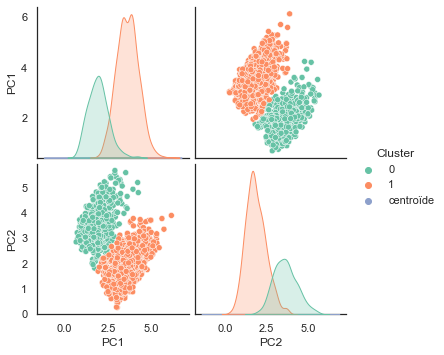

In [74]:
# schuffle neutralise la hierarchie de 0 et 1
sns.pairplot(Cluster_groupe_Kmeans_results_centroides.sample(n=len(Cluster_groupe_Kmeans_results_centroides), random_state=0),hue='Cluster',palette='Set2')


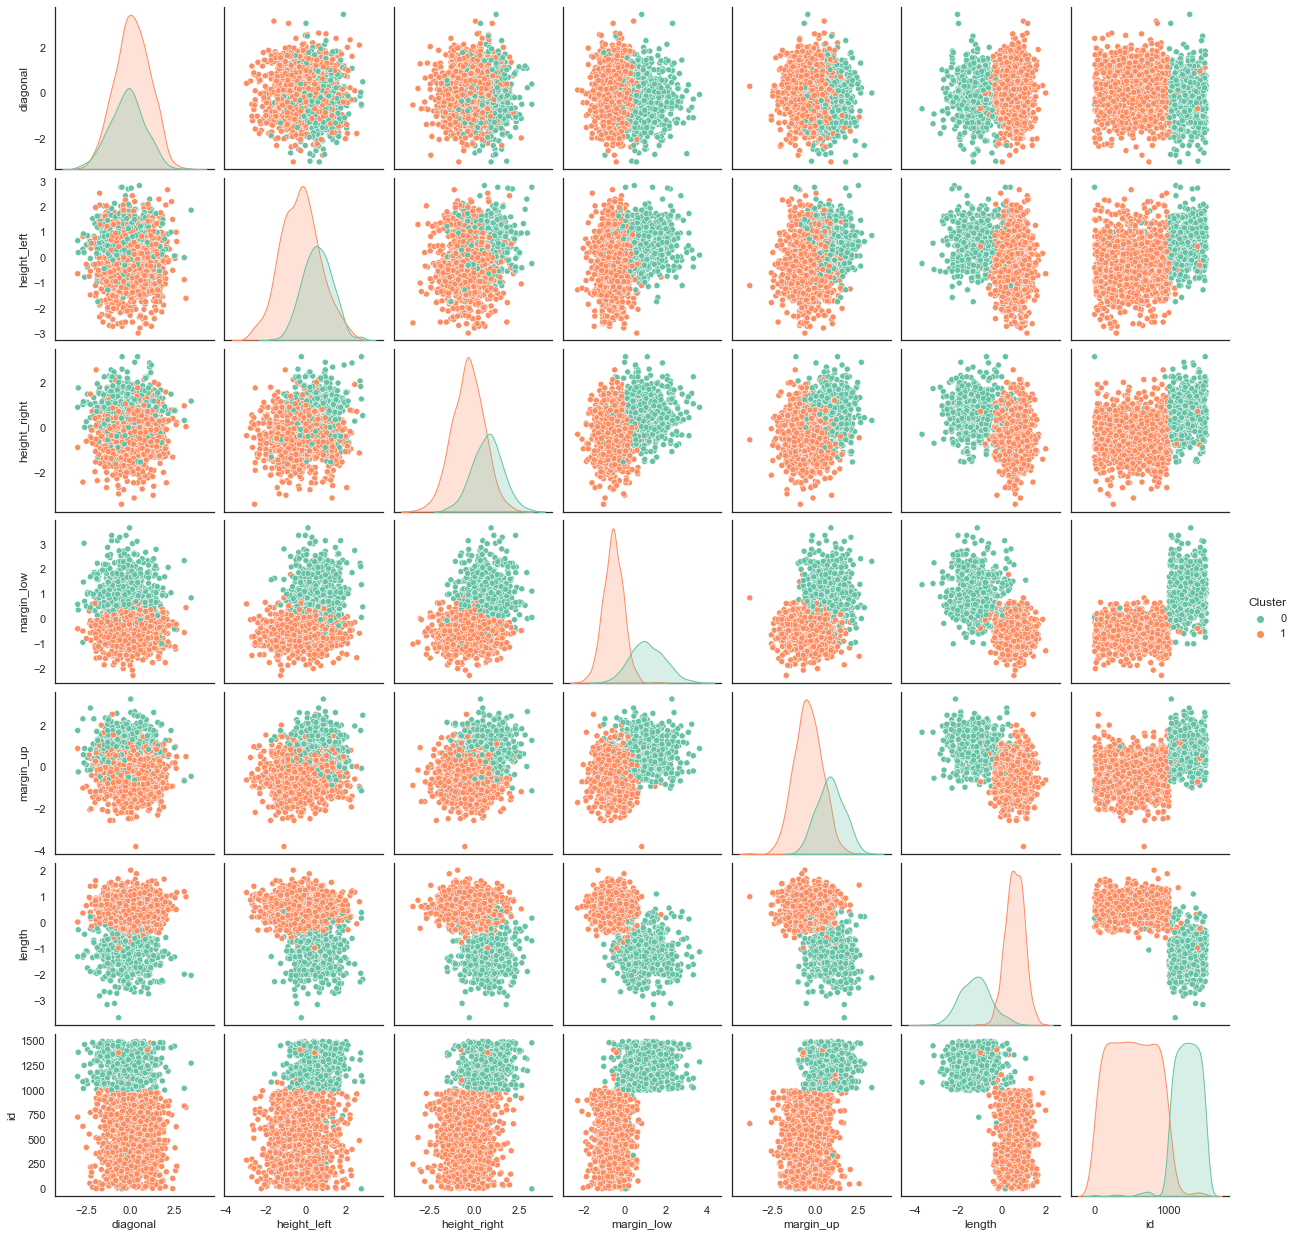

In [75]:
data = Variables_kmeans.loc[:, 'diagonal':'Cluster']
# schuffle neutralise la hierarchie de 0 et 1
sns.pairplot(data.sample(n=len(data), random_state=0),hue='Cluster',palette='Set2')


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

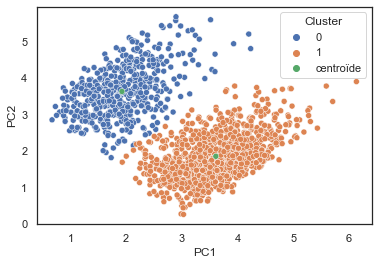

In [76]:
# Visualisation des centroides
sns.scatterplot(data=Cluster_groupe_Kmeans_results_centroides,x="PC1",y="PC2", hue="Cluster")

In [78]:
Cluster_groupe_Kmeans_results_centroides

,Cluster,PC1,PC2
0,0,4.23,4.80
1,1,4.72,2.72
2,1,4.40,3.13
3,1,4.15,2.27
4,1,3.08,2.66
...,...,...,...
1497,0,0.92,3.10
1498,0,1.08,2.95
1499,0,2.03,2.74
1500,centroïde,1.92,3.63


In [79]:
df_final_Kmeans = Variables_kmeans.drop("Cluster", axis=1).merge(Cluster_groupe_Kmeans_results_centroides, left_index=True, right_index=True)
df_final_Kmeans.sample(5)

,is_genuine,check,diagonal,height_left,height_right,margin_low,margin_up,length,id,Cluster,PC1,PC2
932,True,1,-0.62,0.80,0.06,-0.22,-1.21,0.61,932,1,3.17,1.61
1394,False,0,0.14,0.47,1.60,0.36,1.07,-1.73,1394,0,1.34,3.58
118,True,1,-0.13,-1.43,-1.72,-0.38,-0.96,0.95,118,1,4.49,1.92
1351,False,0,0.46,-0.17,1.10,1.97,0.04,-1.82,1351,0,1.71,3.83
99,True,1,-0.09,0.14,0.80,-0.13,-0.05,0.46,99,1,2.32,1.37


In [80]:
df_final_Kmeans.groupby("Cluster").agg({"is_genuine":"count"})


,is_genuine
Cluster,
0,496
1,1004


In [81]:
kmeans_describe = df_final_Kmeans.groupby("Cluster").describe().T
kmeans_describe[74:]

Cluster    0    1
PC2 std 0.71 0.61
    min 1.81 0.25
    25% 3.10 1.41
    50% 3.58 1.77
    75% 4.09 2.24
    max 5.68 3.90

In [82]:
kmeans_describe

Cluster          0        1
check count 496.00 1,004.00
      mean    0.02     0.99
      std     0.14     0.12
      min     0.00     0.00
      25%     0.00     1.00
...            ...      ...
PC2   min     1.81     0.25
      25%     3.10     1.41
      50%     3.58     1.77
      75%     4.09     2.24
      max     5.68     3.90

[80 rows x 2 columns]

In [83]:
df_final_Kmeans.sample(3)

,is_genuine,check,diagonal,height_left,height_right,margin_low,margin_up,length,id,Cluster,PC1,PC2
126,True,1,0.86,0.14,0.18,-0.72,-1.39,0.28,126,1,3.49,1.45
223,True,1,0.04,0.07,-0.31,-0.60,-1.17,-0.01,223,1,3.14,1.02
20,True,1,-0.29,-0.40,0.12,-1.13,-0.78,1.04,20,1,3.75,1.02


In [84]:
df_final_Kmeans.sample(3)

,is_genuine,check,diagonal,height_left,height_right,margin_low,margin_up,length,id,Cluster,PC1,PC2
403,True,1,-0.03,0.00,-0.74,-0.57,-1.73,1.08,403,1,4.15,1.48
387,True,1,1.35,0.54,2.03,-0.35,-1.43,0.23,387,1,3.69,3.01
572,True,1,-0.42,-0.77,0.92,0.27,-1.69,0.66,572,1,3.55,2.10


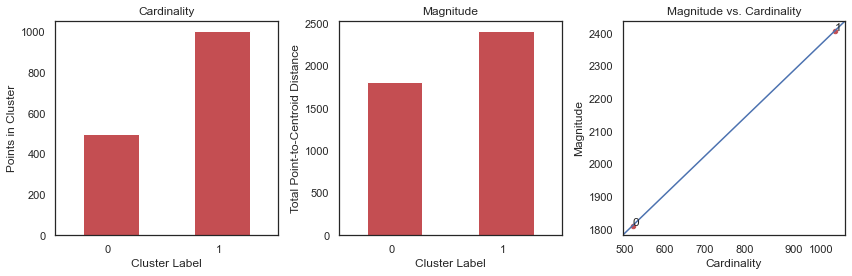

In [85]:
from ds_utils.unsupervised import plot_cluster_cardinality, plot_cluster_magnitude, plot_magnitude_vs_cardinality
from scipy.spatial.distance import euclidean
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(12,4))

plot_cluster_cardinality(km_fit.labels_,
                         ax=ax1,
                         title="Cardinality",
                         color="r"
                        )
plot_cluster_magnitude(X_scaled,
                       km_fit.labels_,
                       km_fit.cluster_centers_,
                       euclidean,
                       ax=ax2,
                       title="Magnitude",
                       color="r"
                      )
plot_magnitude_vs_cardinality(X_scaled,
                              km_fit.labels_,
                              km_fit.cluster_centers_,
                              euclidean,
                              color="r",
                              ax=ax3, 
                              title="Magnitude vs. Cardinality")

fig.autofmt_xdate(rotation=0)
plt.tight_layout()
plt.show()

In [88]:
# FAUX POSITIF
print("Compte des faux positif: ", (len(Variables_kmeans.query("check == 0 & Cluster==1"))))
Kmeans_FP = Variables_kmeans.query("check == 0 & Cluster==1")
Kmeans_FP.index

Compte des faux positif:  14


Int64Index([1025, 1073, 1081, 1083, 1103, 1104, 1122, 1160, 1267, 1362, 1383,
            1407, 1412, 1482],
           dtype='int64')

In [89]:
Kmeans_FP.index.to_list()

[1025,
 1073,
 1081,
 1083,
 1103,
 1104,
 1122,
 1160,
 1267,
 1362,
 1383,
 1407,
 1412,
 1482]

In [90]:
Kmeans_FP = df_final_Kmeans.query("check == 0 & Cluster==1")

# FAUX Positifs
print("Compte des faux positif: ", len(Kmeans_FP.index))
Kmeans_FP.index


Compte des faux positif:  14


Int64Index([1025, 1073, 1081, 1083, 1103, 1104, 1122, 1160, 1267, 1362, 1383,
            1407, 1412, 1482],
           dtype='int64')

In [91]:
Kmeans_FN = df_final_Kmeans.query("check == 1 & Cluster==0")

# FAUX NEGATIF
print("Compte des faux négatif: ", len(Kmeans_FN.index))
Kmeans_FN.index

Compte des faux négatif:  10


Int64Index([0, 253, 341, 580, 626, 669, 724, 728, 743, 946], dtype='int64')

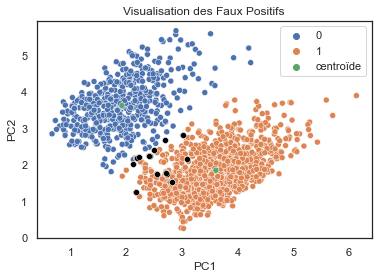

In [92]:
# Visualisation des Faux Positifs

sns.scatterplot(data=Cluster_groupe_Kmeans_results_centroides,x="PC1",y="PC2", hue="Cluster")
sns.scatterplot(data=df_final_Kmeans.loc[df_final_Kmeans["id"].isin(Kmeans_FP.index.to_list())], 
                x="PC1",y="PC2",color="black")
plt.title('Visualisation des Faux Positifs')
plt.show();

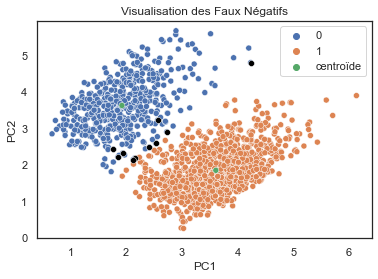

In [93]:
# Visualisation des Faux Négatifs
sns.scatterplot(data=Cluster_groupe_Kmeans_results_centroides,x="PC1",y="PC2", hue="Cluster")
sns.scatterplot(data=df_final_Kmeans.loc[df_final_Kmeans["id"].isin(Kmeans_FN.index.to_list())], x="PC1",y="PC2",color="black")
plt.title('Visualisation des Faux Négatifs')
plt.show()

In [94]:
kmeans_describe = df_final_Kmeans.groupby("Cluster").describe().T
print(kmeans_describe[64:])

Cluster        0        1
PC1 count 496.00 1,004.00
    mean    1.92     3.61
    std     0.58     0.62
    min     0.67     1.93
    25%     1.50     3.19
    50%     1.91     3.60
    75%     2.27     4.01
    max     4.23     6.13
PC2 count 496.00 1,004.00
    mean    3.63     1.85
    std     0.71     0.61
    min     1.81     0.25
    25%     3.10     1.41
    50%     3.58     1.77
    75%     4.09     2.24
    max     5.68     3.90


In [95]:
Kmeans_0_False_describe = Kmeans_FP.groupby("Cluster").describe().T
print(Kmeans_0_False_describe[64:])

Cluster       1
PC1 count 14.00
    mean   2.55
    std    0.31
    min    2.13
    25%    2.28
    50%    2.53
    75%    2.73
    max    3.09
PC2 count 14.00
    mean   2.07
    std    0.43
    min    1.24
    25%    1.76
    50%    2.17
    75%    2.24
    max    2.81


In [96]:
#Vérification id Vs index
df_final.loc[df_final["id"].isin([972,973,974,975,976,977])]

,is_genuine,check,diagonal,height_left,height_right,margin_low,margin_up,length,id
check,,,,,,,,,
1,True,1,-1.83,-0.50,-1.17,-1.11,-1.52,0.38,972
1,True,1,1.48,0.24,-0.06,-0.64,-0.05,-0.08,973
1,True,1,0.33,0.17,-1.38,-0.02,-0.78,1.88,974
1,True,1,1.55,0.03,1.04,0.12,0.38,0.16,975
1,True,1,1.15,0.87,-0.62,-0.76,-1.21,-0.32,976
1,True,1,-1.11,-0.30,0.67,0.16,0.64,0.94,977


# Régression Logistique

La reg logistique explique des variables qualitatives

In [97]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

##### 

In [100]:
df_final

,is_genuine,check,diagonal,height_left,height_right,margin_low,margin_up,length,id
check,,,,,,,,,
1,True,1,-0.49,2.77,3.16,0.06,-1.13,0.17,0
1,True,1,-1.63,-2.24,-0.80,-1.08,-0.70,0.47,1
1,True,1,2.40,1.50,-1.29,-0.13,-0.91,0.55,2
1,True,1,-1.96,-0.40,0.06,-1.31,-0.61,0.95,3
1,True,1,-0.75,0.84,-1.41,-0.67,1.42,-0.16,4
...,...,...,...,...,...,...,...,...,...
0,False,0,-0.68,1.17,0.77,-0.10,-0.27,-1.60,1495
0,False,0,0.76,2.01,1.60,1.19,0.94,-1.96,1496
0,False,0,-0.52,-0.07,0.61,1.56,0.90,-0.84,1497


## Modèle 1 : modele_X_train

In [101]:

from sklearn.linear_model import LogisticRegression
modele_X_train = LogisticRegression(random_state=42)
modele_X_train = modele_X_train.fit(X_train,y_train)
print('Train score :',modele_X_train.score(X_train,y_train))
print('Test score:',modele_X_train.score(X_test,y_test))

Train score : 0.9908333333333333
Test score: 0.9933333333333333


In [102]:
# Calcul des prédictions et affichage du rapport

y_pred_modele_X_train = modele_X_train.predict(X_test)

print(metrics.classification_report(y_test, y_pred_modele_X_train))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       110
           1       0.99      1.00      0.99       190

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



In [103]:
pd.crosstab(y_test, y_pred_modele_X_train)

col_0,0,1
row_0,,
0,108,2
1,0,190


In [104]:
from sklearn.metrics import *

In [105]:
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [106]:
# Matrice et résultats


print("Résultat : modele_X_train")
print("")
print('Train score :',modele_X_train.score(X_train,y_train))
print('Test score:',modele_X_train.score(X_test,y_test))
print("")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_modele_X_train))
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_modele_X_train).ravel()
TPR = tp/(tp+fn) # True Positive Rate (TPR)
FPR = fp/(tn+fp) # False Positive Rate (FPR)
TNR = tn/(tn+fp) # True Negative Rate (TNR)
FNR = fn/(tp+fn) # False Negative Rate (FNR)
print("")
# Affichage et lectude de la matruice de confusion
print("faux négatif:",fn, ", Vrai positif:",tp)
print("Vrai negatif:",tn,", faux positif:", fp)
print("")
print("True Positive Rate: {:.2%}, ".format(TPR), "False Positive Rate {:.2%}, ".format(FPR))
print("True Negative Rate: {:.2%}, ".format(TNR), "False Negative Rate: {:.2%}, ".format(FNR))
print("")
# Calcul des prédictions et affichage du rapport

y_pred_modele_X_train = modele_X_train.predict(X_test)

print(metrics.classification_report(y_test, y_pred_modele_X_train))

print("")
Precision = tp/(tp+fp)
Recall = tp / (tp + fn)
F1_score = 2*(Precision * Recall)/(Precision + Recall)
confusion_matrix_1 = pd.DataFrame(confusion_matrix(y_test, y_pred_modele_X_train))
print("Score:")
print("Precision : {:.2%}".format(Precision))
print("Recall : {:.2%}".format(Recall))
print("F1_score : {:.2%}".format(F1_score))


y_pred_modele_X_train = modele_X_train.predict(X_test)
MSE = metrics.mean_squared_error(y_test, y_pred_modele_X_train)
rmse_train = (np.sqrt(mean_squared_error(y_test, y_pred_modele_X_train)))
r2_pred = r2_score(y_test, y_pred_modele_X_train)


print("Evaluation du modèle")
print('Coefficient de determination')
print('')
print("L'erreur quadratique moyenne (rmse) est {}".format(rmse_train))
print('le score R2 est {}'.format(r2_pred))
print('\n')

Résultat : modele_X_train

Train score : 0.9908333333333333
Test score: 0.9933333333333333

Confusion Matrix:
[[108   2]
 [  0 190]]

faux négatif: 0 , Vrai positif: 190
Vrai negatif: 108 , faux positif: 2

True Positive Rate: 100.00%,  False Positive Rate 1.82%, 
True Negative Rate: 98.18%,  False Negative Rate: 0.00%, 

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       110
           1       0.99      1.00      0.99       190

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300


Score:
Precision : 98.96%
Recall : 100.00%
F1_score : 99.48%
Evaluation du modèle
Coefficient de determination

L'erreur quadratique moyenne (rmse) est 0.08164965809277261
le score R2 est 0.9712918660287081




In [107]:
# test Sauvegarde du modèle choisi

dump(modele_X_train, open('./Assets/modele_X_train.pkl', 'wb'))

In [108]:
# Extraction des variables sous forme de df
prediction = pd.DataFrame()
prediction['y_test'] = y_test
prediction['y_pred'] = y_pred_modele_X_train
prediction['correction'] = prediction['y_test'] == prediction['y_pred']
erreur_prediction_modele_1 = prediction.query('y_test != y_pred')
print("Les 2 faux positifs sont:")
erreur_prediction_modele_1

Les 2 faux positifs sont:


,y_test,y_pred,correction
22,0,1,False
188,0,1,False


In [109]:
erreur_prediction_index = erreur_prediction_modele_1.index.to_list()
erreur_prediction_modele_1b = df_final.iloc[erreur_prediction_index]
erreur_prediction_modele_1b.index

Int64Index([1, 1], dtype='int64', name='check')

In [110]:
erreur_prediction_modele_1b

,is_genuine,check,diagonal,height_left,height_right,margin_low,margin_up,length,id
check,,,,,,,,,
1,True,1,0.46,-0.23,-0.65,-0.84,-1.13,0.00,22
1,True,1,0.46,0.07,-0.25,-1.10,0.08,0.87,188


In [111]:
# proba_model_modele_X_train =  erreur_prediction_modele_1b.reset_index()
proba_model_modele_X_train = erreur_prediction_modele_1b[["id","check"]]
proba_model_modele_X_train = proba_model_modele_X_train.set_index("id")
proba_model_modele_X_train2 = pd.DataFrame(modele_X_train.predict_proba(X_test))
proba_model_modele_X_train = proba_model_modele_X_train.merge(proba_model_modele_X_train2, left_index=True, right_index=True)
proba_model_modele_X_train

,check,0,1
22,1,0.40,0.60
188,1,0.27,0.73


## Modèle 2 : modele_Xresampled

In [112]:
modele_Xresampled = LogisticRegression(random_state=42)
modele_Xresampled = modele_Xresampled.fit(Xresampled, yresampled)

In [113]:
print("modele_Xresampled Best Score :",modele_Xresampled.score(X_test_resampled, y_test_resampled))

modele_Xresampled Best Score : 0.9825


In [114]:
# Calculated the f1  score

y_pred_modele_Xresampled = modele_Xresampled.predict(X_test_resampled)

print(metrics.classification_report(y_test_resampled, y_pred_modele_Xresampled))

              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98       199
         1.0       0.97      1.00      0.98       201

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400



In [115]:
import statsmodels.api as sm

In [116]:
yresampled

array([0., 0., 0., ..., 0., 1., 1.])

In [117]:
# Affichage des coefficients du modèle

coef_modele_Xresampled = pd.DataFrame(np.concatenate([modele_Xresampled.intercept_.reshape(-1,1),
                             modele_Xresampled.coef_],axis=1),
             index = ["coef_modele_Xresampled"],
             columns = ["constante"]+list(X.columns)).T
coef_modele_Xresampled



,coef_modele_Xresampled
constante,1.72
diagonal,0.32
height_left,-0.50
height_right,-0.54
margin_low,-2.86
margin_up,-2.04
length,4.19


In [118]:
# Matrice et résultats

y_pred_modele_Xresampled = modele_Xresampled.predict(X_test_resampled)

print("Résultat : modele_Xresampled")
print('Train score :',modele_Xresampled.score(Xresampled,yresampled))
print('Test score:',modele_Xresampled.score(X_test_resampled,y_test_resampled))
print("")
print("Confusion Matrix:")
print(confusion_matrix(y_test_resampled, y_pred_modele_Xresampled))
tn, fp, fn, tp = confusion_matrix(y_test_resampled, y_pred_modele_Xresampled).ravel()
TPR = tp/(tp+fn) # True Positive Rate (TPR)
FPR = fp/(tn+fp) # False Positive Rate (FPR)
TNR = tn/(tn+fp) # True Negative Rate (TNR)
FNR = fn/(tp+fn) # False Negative Rate (FNR)
print("")
# Affichage et lectude de la matruice de confusion
print("faux négatif:",fn, "Vrai positif:",tp)
print("Vrai negatif:",tn,"faux positif:", fp)
print("")
print("True Positive Rate: {:.2%}, ".format(TPR), "False Positive Rate {:.2%}, ".format(FPR))
print("True Negative Rate: {:.2%}, ".format(TNR), "False Negative Rate: {:.2%}, ".format(FNR))
print("")

Precision = tp/(tp+fp)
Recall = tp / (tp + fn)
F1_score = 2*((Precision * Recall)/(Precision + Recall))
confusion_matrix_1 = pd.DataFrame(confusion_matrix(y_test_resampled, y_pred_modele_Xresampled))
print("Score:")
print("Precision : {:.2%}".format(Precision))
print("Recall : {:.2%}".format(Recall))
print("F1_score : {:.2%}".format(F1_score))

MSE = metrics.mean_squared_error(y_test_resampled, y_pred_modele_Xresampled)
rmse= (np.sqrt(mean_squared_error(y_test_resampled, y_pred_modele_Xresampled)))
r2_pred = r2_score(y_test_resampled, y_pred_modele_Xresampled)


print("Evaluation du modèle")
print('Coefficient de determination')
print('')
print("L'erreur quadratique moyenne (rmse) est {}".format(rmse))
print('le score R2 est {}'.format(r2_pred))
print('\n')

Résultat : modele_Xresampled
Train score : 0.993125
Test score: 0.9825

Confusion Matrix:
[[193   6]
 [  1 200]]

faux négatif: 1 Vrai positif: 200
Vrai negatif: 193 faux positif: 6

True Positive Rate: 99.50%,  False Positive Rate 3.02%, 
True Negative Rate: 96.98%,  False Negative Rate: 0.50%, 

Score:
Precision : 97.09%
Recall : 99.50%
F1_score : 98.28%
Evaluation du modèle
Coefficient de determination

L'erreur quadratique moyenne (rmse) est 0.13228756555322954
le score R2 est 0.9299982499562489




In [119]:
prediction = pd.DataFrame()
prediction['y_test'] = y_test_resampled
prediction['y_pred'] = y_pred_modele_Xresampled
prediction['correction'] = prediction['y_test'] == prediction['y_pred']
erreur_prediction_modele_2 = prediction.query('y_test != y_pred')
erreur_prediction_modele_2

,y_test,y_pred,correction
166,1.00,0.00,False
171,0.00,1.00,False
194,0.00,1.00,False
226,0.00,1.00,False
253,0.00,1.00,False
364,0.00,1.00,False
395,0.00,1.00,False


In [120]:
erreur_prediction_index2 = erreur_prediction_modele_2.index.to_list()

In [121]:
erreur_prediction_modele_2b = df_final.iloc[erreur_prediction_index2]
erreur_prediction_modele_2b

,is_genuine,check,diagonal,height_left,height_right,margin_low,margin_up,length,id
check,,,,,,,,,
1,True,1,1.15,0.07,-1.26,-0.08,-1.26,0.57,166
1,True,1,1.45,-1.74,-1.23,-1.22,0.04,0.77,171
1,True,1,-0.06,1.04,0.21,-0.32,-1.21,0.53,194
1,True,1,-0.39,-0.73,-0.28,-0.23,-1.26,0.53,226
1,True,1,0.37,1.00,1.26,-0.11,1.03,0.82,253
1,True,1,1.09,-0.67,-2.06,-1.31,-0.70,0.52,364
1,True,1,-0.45,1.00,-0.28,-0.85,-1.82,0.36,395


In [122]:
erreur_prediction_modele_2b.index

Int64Index([1, 1, 1, 1, 1, 1, 1], dtype='int64', name='check')

In [123]:
#proba_model_modele_Xresampled =  erreur_prediction_modele_2b.reset_index()
proba_model_modele_Xresampled = erreur_prediction_modele_2b[["id"]]
proba_model_modele_Xresampled = proba_model_modele_Xresampled.set_index("id")
proba_model_modele_Xresampled2 = pd.DataFrame(modele_Xresampled.predict_proba(X_test))
proba_model_modele_Xresampled = proba_model_modele_Xresampled.merge(proba_model_modele_Xresampled2, left_index=True, right_index=True)
proba_model_modele_Xresampled

,0,1
166,1.00,0.00
171,1.00,0.00
194,0.01,0.99
226,0.00,1.00
253,0.57,0.43


# Amélioration des modèles

In [124]:
from sklearn.model_selection import GridSearchCV

In [125]:
import warnings
warnings.filterwarnings('ignore')
# parameter grid
parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear']
   # 'modèle'  : [ logreg, modele_Xresampled, modele_X_train]
}

## Modèle 3 modele_X_train_grid

In [126]:
import warnings
warnings.filterwarnings('ignore')
# parameter grid
parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear']
}

grid = GridSearchCV(LogisticRegression(),
                    parameters, 
                    scoring="f1",
                    cv=5)

grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='f1')

In [127]:
grid.best_params_ # meilleurs paramètres attribués

{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}

In [128]:
modele_X_train_grid = grid.best_estimator_ 


In [129]:
# summarize result
modele_X_train_grid.fit(X_train,y_train)
print('Train Score: %s' % modele_X_train_grid.score(X_train,y_train))
print('Test Score: %s' % modele_X_train_grid.score(X_test,y_test))


Train Score: 0.9916666666666667
Test Score: 0.99


In [130]:
y_pred_modele_X_train_grid = modele_X_train_grid.predict(X_test)

In [131]:
proba_modele_X_train_grid = modele_X_train_grid.predict_proba(X_test)

In [132]:
confusion_matrix_3 = pd.crosstab(y_test, y_pred_modele_X_train_grid)
confusion_matrix_3

col_0,0,1
row_0,,
0,107,3
1,0,190


In [133]:
# Matrice et résultats


print("Résultat : modele_X_train_grid")
# Calculated the f1  score

y_pred_modele_X_train_grid = modele_X_train_grid.predict(X_test)

print(metrics.classification_report(y_test, y_pred_modele_X_train_grid))
print("")
print('Train score :',modele_X_train_grid.score(X_train,y_train))
print('Test score:',modele_X_train_grid.score(X_test,y_test))
print("")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_modele_X_train_grid))
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_modele_X_train_grid).ravel()
TPR = tp/(tp+fn) # True Positive Rate (TPR)
FPR = fp/(tn+fp) # False Positive Rate (FPR)
TNR = tn/(tn+fp) # True Negative Rate (TNR)
FNR = fn/(tp+fn) # False Negative Rate (FNR)
print("")
# Affichage et lectude de la matruice de confusion
print("faux négatif:",fn, "Vrai positif:",tp)
print("Vrai negatif:",tn,"faux positif:", fp)
print("")
print("True Positive Rate: {:.2%}, ".format(TPR), "False Positive Rate {:.2%}, ".format(FPR))
print("True Negative Rate: {:.2%}, ".format(TNR), "False Negative Rate: {:.2%}, ".format(FNR))
print("")

Precision = tp/(tp+fp)
Recall = tp / (tp + fn)
F1_score = 2*((Precision * Recall)/(Precision + Recall))
confusion_matrix_1 = pd.DataFrame(confusion_matrix(y_test, y_pred_modele_X_train_grid))
print("Score:")
print("Precision : {:.2%}".format(Precision))
print("Recall : {:.2%}".format(Recall))
print("F1_score : {:.2%}".format(F1_score))


y_pred_modele_X_train_grid = modele_X_train_grid.predict(X_test)
MSE = metrics.mean_squared_error(y_test, y_pred_modele_X_train_grid)
rmse= (np.sqrt(mean_squared_error(y_test, y_pred_modele_X_train_grid)))
r2_pred = r2_score(y_test, y_pred_modele_X_train_grid)


print("Evaluation du modèle")
print('Coefficient de determination')
print('')
print("L'erreur quadratique moyenne (rmse) est {}".format(rmse))
print('le score R2 est {}'.format(r2_pred))
print('\n')

Résultat : modele_X_train_grid
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       110
           1       0.98      1.00      0.99       190

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300


Train score : 0.9916666666666667
Test score: 0.99

Confusion Matrix:
[[107   3]
 [  0 190]]

faux négatif: 0 Vrai positif: 190
Vrai negatif: 107 faux positif: 3

True Positive Rate: 100.00%,  False Positive Rate 2.73%, 
True Negative Rate: 97.27%,  False Negative Rate: 0.00%, 

Score:
Precision : 98.45%
Recall : 100.00%
F1_score : 99.22%
Evaluation du modèle
Coefficient de determination

L'erreur quadratique moyenne (rmse) est 0.1
le score R2 est 0.9569377990430622




In [134]:
# test Sauvegarde du modèle choisi

dump(modele_X_train_grid, open('./Assets/modele_X_train_grid.pkl', 'wb'))

In [135]:
prediction = pd.DataFrame()
prediction['y_test'] = y_test
prediction['y_pred'] = y_pred_modele_X_train_grid
prediction['correction'] = prediction['y_test'] == prediction['y_pred']
erreur_prediction_modele_3 = prediction.query('y_test != y_pred')
erreur_prediction_modele_3

,y_test,y_pred,correction
22,0,1,False
188,0,1,False
192,0,1,False


In [136]:
erreur_prediction_index3 = erreur_prediction_modele_3.index.to_list()
erreur_prediction_modele_3b = df_final.iloc[erreur_prediction_index3]
erreur_prediction_modele_3b

,is_genuine,check,diagonal,height_left,height_right,margin_low,margin_up,length,id
check,,,,,,,,,
1,True,1,0.46,-0.23,-0.65,-0.84,-1.13,0.00,22
1,True,1,0.46,0.07,-0.25,-1.10,0.08,0.87,188
1,True,1,-0.58,-0.97,-1.14,-0.95,-1.21,0.84,192


In [137]:
erreur_prediction_modele_3b.index

Int64Index([1, 1, 1], dtype='int64', name='check')

In [138]:
#proba_modele_X_train_grid =  erreur_prediction_modele_3b.reset_index()
proba_modele_X_train_grid = erreur_prediction_modele_3b[["id","is_genuine"]]
proba_modele_X_train_grid = proba_modele_X_train_grid.set_index("id")
proba_modele_X_train_grid2 = pd.DataFrame(modele_X_train_grid.predict_proba(X_test))
proba_modele_X_train_grid = proba_modele_X_train_grid.merge(proba_modele_X_train_grid2, left_index=True, right_index=True)
proba_modele_X_train_grid

,is_genuine,0,1
22,True,0.26,0.74
188,True,0.47,0.53
192,True,0.41,0.59


## Modele 4 model_Xresampled_grid

In [139]:
grid.fit(Xresampled, yresampled)


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='f1')

In [140]:
model_Xresampled_grid = grid.best_estimator_

In [141]:
print("modele_Xresampled_grid Train Score :",model_Xresampled_grid.score(Xresampled, yresampled))
print("modele_Xresampled_grid Test Score :",model_Xresampled_grid.score(X_test_resampled, y_test_resampled))

modele_Xresampled_grid Train Score : 0.995
modele_Xresampled_grid Test Score : 0.98


In [142]:
# Print the imbalanced classification report

y_pred_model_Xresampled_grid = model_Xresampled_grid.predict(X_test_resampled)


print(metrics.classification_report(y_test_resampled, y_pred_model_Xresampled_grid))

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       199
         1.0       0.98      0.98      0.98       201

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400



In [143]:
# test Sauvegarde du modèle choisi

dump(model_Xresampled_grid, open('./Assets/model_Xresampled_grid.pkl', 'wb'))

In [144]:
# Matrice et résultats


print("Résultat : model_Xresampled_grid")
print('Train score :',model_Xresampled_grid.score(Xresampled,yresampled))
print('Test score:',model_Xresampled_grid.score(X_test_resampled,y_test_resampled))
print("")
print("Confusion Matrix:")
print(confusion_matrix(y_test_resampled, y_pred_model_Xresampled_grid))
tn, fp, fn, tp = confusion_matrix(y_test_resampled, y_pred_model_Xresampled_grid).ravel()
TPR = tp/(tp+fn) # True Positive Rate (TPR)
FPR = fp/(tn+fp) # False Positive Rate (FPR)
TNR = tn/(tn+fp) # True Negative Rate (TNR)
FNR = fn/(tp+fn) # False Negative Rate (FNR)
print("")
# Affichage et lectude de la matruice de confusion
print("faux négatif:",fn, "Vrai positif:",tp)
print("Vrai negatif:",tn,"faux positif:", fp)
print("")
print("True Positive Rate: {:.2%}, ".format(TPR), "False Positive Rate {:.2%}, ".format(FPR))
print("True Negative Rate: {:.2%}, ".format(TNR), "False Negative Rate: {:.2%}, ".format(FNR))
print("")

Precision = tp/(tp+fp)
Recall = tp / (tp + fn)
F1_score = 2*((Precision * Recall)/(Precision + Recall))
confusion_matrix_1 = pd.DataFrame(confusion_matrix(y_test_resampled, y_pred_model_Xresampled_grid))
print("Score:")
print("Precision : {:.2%}".format(Precision))
print("Recall : {:.2%}".format(Recall))
print("F1_score : {:.2%}".format(F1_score))

y_pred_model_Xresampled_grid = model_Xresampled_grid.predict(X_test_resampled)
MSE = metrics.mean_squared_error(y_test_resampled, y_pred_model_Xresampled_grid)
rmse= (np.sqrt(mean_squared_error(y_test_resampled, y_pred_model_Xresampled_grid)))
r2_pred = r2_score(y_test_resampled, y_pred_model_Xresampled_grid)


print("Evaluation du modèle")
print('Coefficient de determination')
print('')
print("L'erreur quadratique moyenne (rmse) est {}".format(rmse))
print('le score R2 est {}'.format(r2_pred))
print('\n')

Résultat : model_Xresampled_grid
Train score : 0.995
Test score: 0.98

Confusion Matrix:
[[195   4]
 [  4 197]]

faux négatif: 4 Vrai positif: 197
Vrai negatif: 195 faux positif: 4

True Positive Rate: 98.01%,  False Positive Rate 2.01%, 
True Negative Rate: 97.99%,  False Negative Rate: 1.99%, 

Score:
Precision : 98.01%
Recall : 98.01%
F1_score : 98.01%
Evaluation du modèle
Coefficient de determination

L'erreur quadratique moyenne (rmse) est 0.1414213562373095
le score R2 est 0.9199979999499988




In [145]:
prediction = pd.DataFrame()
prediction['valeur_actuelle'] = y_test_resampled
prediction['valeur_predite'] = y_pred_model_Xresampled_grid
prediction['correction'] = prediction['valeur_actuelle'] == prediction['valeur_predite']
erreur_prediction_modele_4 = prediction.query('valeur_actuelle != valeur_predite')
erreur_prediction_modele_4

,valeur_actuelle,valeur_predite,correction
73,1.00,0.00,False
128,1.00,0.00,False
166,1.00,0.00,False
171,0.00,1.00,False
250,1.00,0.00,False
253,0.00,1.00,False
364,0.00,1.00,False
395,0.00,1.00,False


In [146]:
erreur_prediction_index = erreur_prediction_modele_4.index.to_list()
erreur_prediction_modele_4b = df_final.iloc[erreur_prediction_index]
erreur_prediction_modele_4b

,is_genuine,check,diagonal,height_left,height_right,margin_low,margin_up,length,id
check,,,,,,,,,
1,True,1,-1.99,-1.50,-1.01,-0.61,-1.30,1.62,73
1,True,1,0.01,1.04,-0.22,-0.81,0.55,1.21,128
1,True,1,1.15,0.07,-1.26,-0.08,-1.26,0.57,166
1,True,1,1.45,-1.74,-1.23,-1.22,0.04,0.77,171
1,True,1,1.38,-1.94,0.58,0.36,-0.61,0.59,250
1,True,1,0.37,1.00,1.26,-0.11,1.03,0.82,253
1,True,1,1.09,-0.67,-2.06,-1.31,-0.70,0.52,364
1,True,1,-0.45,1.00,-0.28,-0.85,-1.82,0.36,395


In [147]:
#proba_model_Xresampled_grid =  erreur_prediction_modele_4b.reset_index()
proba_model_Xresampled_grid = erreur_prediction_modele_4b[["id","is_genuine"]]
proba_model_Xresampled_grid = proba_model_Xresampled_grid.set_index("id")
proba_model_Xresampled_grid2 = pd.DataFrame(model_Xresampled_grid.predict_proba(X_test))
proba_model_Xresampled_grid = proba_model_Xresampled_grid.merge(proba_model_Xresampled_grid2, left_index=True, right_index=True)
proba_model_Xresampled_grid

,is_genuine,0,1
73,True,0.00,1.00
128,True,1.00,0.00
166,True,1.00,0.00
171,True,1.00,0.00
250,True,1.00,0.00
253,True,0.68,0.32


In [148]:
erreur_prediction_modele_4b.index

Int64Index([1, 1, 1, 1, 1, 1, 1, 1], dtype='int64', name='check')

# Choix Modèle

## amélioration recall 

In [149]:
y_true = np.array(df_final["check"])

In [150]:
from sklearn.datasets import make_classification
from sklearn.metrics import PrecisionRecallDisplay

(0.0, 1.0)

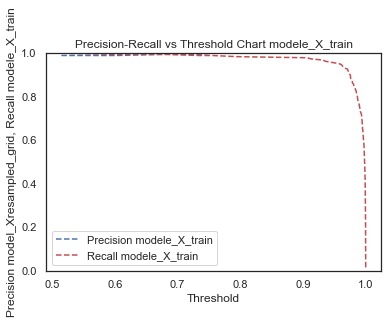

In [151]:
### Predict test_y values and probabilities based on fitted logistic 


y_pred =modele_X_train.predict(X_test) 

y_probs=modele_X_train.predict_proba(X_test) 
  # probs_y is a 2-D array of probability of being labeled as 0 (first 


from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_probs[:, 
1]) 
   #retrieve probability of being 1(in second column of probs_y)
pr_auc = metrics.auc(recall, precision)

plt.title("Precision-Recall vs Threshold Chart modele_X_train")
plt.plot(thresholds, precision[: -1], "b--", label="Precision modele_X_train")
plt.plot(thresholds, recall[: -1], "r--", label="Recall modele_X_train")
plt.ylabel("Precision model_Xresampled_grid, Recall modele_X_train")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])

(0.0, 1.0)

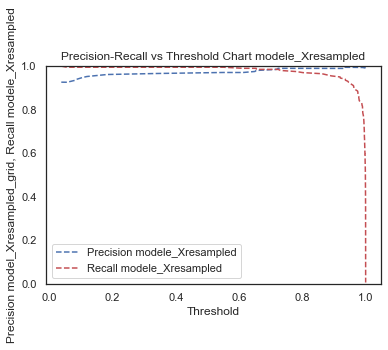

In [153]:
### Predict test_y values and probabilities based on fitted logistic 


y_pred_resampled =modele_Xresampled.predict(X_test_resampled) 

y_probs_resampled=modele_Xresampled.predict_proba(X_test_resampled) 
  # probs_y is a 2-D array of probability of being labeled as 0 (first 


from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test_resampled, y_probs_resampled[:, 
1]) 
   #retrieve probability of being 1(in second column of probs_y)
pr_auc = metrics.auc(recall, precision)

plt.title("Precision-Recall vs Threshold Chart modele_Xresampled")
plt.plot(thresholds, precision[: -1], "b--", label="Precision modele_Xresampled")
plt.plot(thresholds, recall[: -1], "r--", label="Recall modele_Xresampled")
plt.ylabel("Precision model_Xresampled_grid, Recall modele_Xresampled")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])



In [154]:
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, confusion_matrix


## Recall optimisation

## Sur X_train

## Modèle 5 : modele_X_train_threshold

In [155]:
class LogisticRegressionWithThreshold(LogisticRegression):
    def predict(self, X, threshold=None):
        if threshold == None: # If no threshold passed in, simply call the base class predict, effectively threshold=0.5
            return LogisticRegression.predict(self, X)
        else:
            y_scores = LogisticRegression.predict_proba(self, X)[:, 1]
            y_pred_with_threshold = (y_scores <= threshold).astype(int)

            return y_pred_with_threshold
    
    def threshold_from_optimal_tpr_minus_fpr(self, X, y):
        y_scores = LogisticRegression.predict_proba(self, X)[:, 1]
        fpr, tpr, thresholds = roc_curve(y, y_scores) 

        optimal_idx = np.argmax(tpr - fpr)

        return thresholds[optimal_idx], tpr[optimal_idx] - fpr[optimal_idx]


In [156]:
lrt = LogisticRegressionWithThreshold(C= 1.0, penalty= 'l1', solver= 'liblinear')

modele_X_train_threshold = lrt.fit(X_train, y_train)

threshold, optimal_tpr_minus_fpr = modele_X_train_threshold.threshold_from_optimal_tpr_minus_fpr(X_train, y_train)
y_pred_new_threshold_X_train = modele_X_train_threshold.predict(X_test, threshold)

threshold, optimal_tpr_minus_fpr
print("threshold_X_train:", threshold)
print("optimal_tpr_minus_fpr_X_train:", optimal_tpr_minus_fpr)

threshold_X_train: 0.8054876332242425
optimal_tpr_minus_fpr_X_train: 0.978727445394112


In [157]:
# Matrice et résultats

y_pred_new_threshold_X_train = pd.DataFrame((modele_X_train_threshold).predict_proba(X_test)[:,1]>=0.71)

print("Résultat : model_Threshold_X_train")
print('Train score :',modele_X_train_threshold.score(X_train,y_train))
print('Test score:',modele_X_train_threshold.score(X_test,y_test))
print("")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_new_threshold_X_train))
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_new_threshold_X_train).ravel()
TPR = tp/(tp+fn) # True Positive Rate (TPR)
FPR = fp/(tn+fp) # False Positive Rate (FPR)
TNR = tn/(tn+fp) # True Negative Rate (TNR)
FNR = fn/(tp+fn) # False Negative Rate (FNR)
print("")
# Affichage et lectude de la matruice de confusion
print("faux négatif:",fn, "Vrai positif:",tp)
print("Vrai negatif:",tn,"faux positif:", fp)
print("")
print("True Positive Rate: {:.2%}, ".format(TPR), "False Positive Rate {:.2%}, ".format(FPR))
print("True Negative Rate: {:.2%}, ".format(TNR), "False Negative Rate: {:.2%}, ".format(FNR))
print("")

Precision = tp/(tp+fp)
Recall = tp / (tp + fn)
F1_score = 2*((Precision * Recall)/(Precision + Recall))
confusion_matrix_1 = pd.DataFrame(confusion_matrix(y_test, y_pred_new_threshold_X_train))
print("Score:")
print("Precision : {:.2%}".format(Precision))
print("Recall : {:.2%}".format(Recall))
print("F1_score : {:.2%}".format(F1_score))

MSE = metrics.mean_squared_error(y_test, y_pred_new_threshold_X_train)
rmse= (np.sqrt(mean_squared_error(y_test, y_pred_new_threshold_X_train)))
r2_pred = r2_score(y_test, y_pred_new_threshold_X_train)


print("Evaluation du modèle")
print('Coefficient de determination')
print('')
print("L'erreur quadratique moyenne (rmse) est {}".format(rmse))
print('le score R2 est {}'.format(r2_pred))
print('\n')

Résultat : model_Threshold_X_train
Train score : 0.9916666666666667
Test score: 0.9933333333333333

Confusion Matrix:
[[110   0]
 [  2 188]]

faux négatif: 2 Vrai positif: 188
Vrai negatif: 110 faux positif: 0

True Positive Rate: 98.95%,  False Positive Rate 0.00%, 
True Negative Rate: 100.00%,  False Negative Rate: 1.05%, 

Score:
Precision : 100.00%
Recall : 98.95%
F1_score : 99.47%
Evaluation du modèle
Coefficient de determination

L'erreur quadratique moyenne (rmse) est 0.08164965809277261
le score R2 est 0.9712918660287081




In [158]:
# Sauvegarde du modèle choisi

dump(modele_X_train_threshold, open('./Assets/model_P10.pkl', 'wb'))

In [205]:
# Sauvegarde du modèle 

dump(modele_X_train_threshold, open('./Assets/modele_X_train_threshold.pkl', 'wb'))

In [159]:
pd.DataFrame((modele_X_train_threshold).predict_proba(X_test)[:,1]>=threshold).sum()

0    186
dtype: int64

In [160]:
pd.DataFrame((modele_X_train_threshold).predict_proba(X_test)[:,1])

,0
0,0.00
1,0.00
2,1.00
3,1.00
4,1.00
...,...
295,1.00
296,0.99
297,0.00
298,0.09


## Modèle 6 : model_Threshold_Xresampled

## Sur Xresampled

In [161]:
lrt = LogisticRegressionWithThreshold()

model_Threshold_Xresampled = lrt.fit(Xresampled, yresampled)

threshold, optimal_tpr_minus_fpr = model_Threshold_Xresampled.threshold_from_optimal_tpr_minus_fpr(Xresampled, yresampled)
y_pred_new_threshold_Xresampled = model_Threshold_Xresampled.predict(X_test_resampled, threshold)

threshold, optimal_tpr_minus_fpr
print("threshold_Xresampled:", threshold)
print("optimal_tpr_minus_fpr_Xresampled:", optimal_tpr_minus_fpr)

threshold_Xresampled: 0.4301834248871628
optimal_tpr_minus_fpr_Xresampled: 0.9875093554833679


### Modification du seuil de probabilité sur model_Xresampled_grid

In [162]:
# Matrice et résultats

y_pred_new_threshold_Xresampled = pd.DataFrame((model_Threshold_Xresampled).predict_proba(X_test_resampled)[:,1]>=0.72)

print("Résultat : model_Threshold_Xresampled")
print('Train score :',model_Threshold_Xresampled.score(Xresampled,yresampled))
print('Test score:',model_Threshold_Xresampled.score(X_test_resampled,y_test_resampled))
print("")
print("Confusion Matrix:")
print(confusion_matrix(y_test_resampled, y_pred_new_threshold_Xresampled))
tn, fp, fn, tp = confusion_matrix(y_test_resampled, y_pred_new_threshold_Xresampled).ravel()
TPR = tp/(tp+fn) # True Positive Rate (TPR)
FPR = fp/(tn+fp) # False Positive Rate (FPR)
TNR = tn/(tn+fp) # True Negative Rate (TNR)
FNR = fn/(tp+fn) # False Negative Rate (FNR)
print("")
# Affichage et lectude de la matruice de confusion
print("faux négatif:",fn, "Vrai positif:",tp)
print("Vrai negatif:",tn,"faux positif:", fp)
print("")
print("True Positive Rate: {:.2%}, ".format(TPR), "False Positive Rate {:.2%}, ".format(FPR))
print("True Negative Rate: {:.2%}, ".format(TNR), "False Negative Rate: {:.2%}, ".format(FNR))
print("")

Precision = tp/(tp+fp)
Recall = tp / (tp + fn)
F1_score = 2*((Precision * Recall)/(Precision + Recall))
confusion_matrix_1 = pd.DataFrame(confusion_matrix(y_test_resampled, y_pred_new_threshold_Xresampled))
print("Score:")
print("Precision : {:.2%}".format(Precision))
print("Recall : {:.2%}".format(Recall))
print("F1_score : {:.2%}".format(F1_score))

MSE = metrics.mean_squared_error(y_test_resampled, y_pred_new_threshold_Xresampled)
rmse= (np.sqrt(mean_squared_error(y_test_resampled, y_pred_new_threshold_Xresampled)))
r2_pred = r2_score(y_test_resampled, y_pred_new_threshold_Xresampled)


print("Evaluation du modèle")
print('Coefficient de determination')
print('')
print("L'erreur quadratique moyenne (rmse) est {}".format(rmse))
print('le score R2 est {}'.format(r2_pred))
print('\n')

Résultat : model_Threshold_Xresampled
Train score : 0.993125
Test score: 0.9825

Confusion Matrix:
[[197   2]
 [  3 198]]

faux négatif: 3 Vrai positif: 198
Vrai negatif: 197 faux positif: 2

True Positive Rate: 98.51%,  False Positive Rate 1.01%, 
True Negative Rate: 98.99%,  False Negative Rate: 1.49%, 

Score:
Precision : 99.00%
Recall : 98.51%
F1_score : 98.75%
Evaluation du modèle
Coefficient de determination

L'erreur quadratique moyenne (rmse) est 0.11180339887498948
le score R2 est 0.9499987499687492




In [163]:
# Sauvegarde du modèle choisi

dump(model_Threshold_Xresampled, open('./Assets/model_Threshold_Xresampled.pkl', 'wb'))

In [164]:
prediction = pd.DataFrame()
prediction['y_test'] = y_test_resampled
prediction['y_pred'] = y_pred_new_threshold_Xresampled
prediction['correction'] = prediction['y_test'] == prediction['y_pred']
erreur_prediction_modele_6_threshold = prediction.query('y_test != y_pred')
erreur_prediction_index = erreur_prediction_modele_6_threshold.index.to_list()
erreur_prediction_modele_6c = df_final.iloc[erreur_prediction_index]
erreur_prediction_modele_6c

,is_genuine,check,diagonal,height_left,height_right,margin_low,margin_up,length,id
check,,,,,,,,,
1,True,1,-1.01,-2.44,-1.14,-0.52,0.94,0.22,76
1,True,1,1.15,0.07,-1.26,-0.08,-1.26,0.57,166
1,True,1,1.38,-1.94,0.58,0.36,-0.61,0.59,250
1,True,1,0.37,1.00,1.26,-0.11,1.03,0.82,253
1,True,1,-0.45,1.00,-0.28,-0.85,-1.82,0.36,395


In [165]:
#proba_model_Threshold_Xresampled =  erreur_prediction_modele_6c.reset_index()
proba_model_Threshold_Xresampled = erreur_prediction_modele_6c[["id","is_genuine"]]
proba_model_Threshold_Xresampled = proba_model_Threshold_Xresampled.set_index("id")
proba_model_Threshold_Xresampled2 = pd.DataFrame(model_Threshold_Xresampled.predict_proba(X_test))
proba_model_Threshold_Xresampled = proba_model_Threshold_Xresampled.merge(proba_model_Threshold_Xresampled2, left_index=True, right_index=True)
proba_model_Threshold_Xresampled

,is_genuine,0,1
76,True,0.00,1.00
166,True,1.00,0.00
250,True,1.00,0.00
253,True,0.57,0.43


# Ensemble Learning

## Mes Modèles

In [166]:
modele_1 = modele_X_train
modele_2 = modele_Xresampled 

modele_3 = modele_X_train_grid
modele_4 = model_Xresampled_grid


modele_5 = modele_X_train_threshold 
modele_6 = model_Threshold_Xresampled

### Voting Classifier

In [167]:
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB

#### Performances des modèles

#### Voting

In [168]:
Voting_model_X_train = VotingClassifier([('LogisticRegression' , modele_1),
                                  ('GridSearchCV', modele_3),
                                  ('LogisticRegressionWithThreshold', modele_5)],
                                 voting = 'soft')
for model_X_train in (modele_1, modele_3, modele_5, Voting_model_X_train):
    model_X_train.fit(X_train, y_train)
    print(model_X_train.__class__.__name__, model_X_train.score(X_test, y_test))

LogisticRegression 0.9933333333333333
LogisticRegression 0.99
LogisticRegressionWithThreshold 0.9933333333333333
VotingClassifier 0.9933333333333333


In [169]:
Voting_model_Xresampled = VotingClassifier([('LogisticRegression' , modele_2),
                                  ('GridSearchCV', modele_4),
                                  ('LogisticRegressionWithThreshold', modele_6)],
                                 voting = 'soft')
for model_Xresampled  in (modele_2, modele_4, modele_6,Voting_model_Xresampled):
    model_Xresampled.fit(Xresampled , yresampled)
    print(model_Xresampled.__class__.__name__, model_Xresampled.score(X_test, y_test))

LogisticRegression 0.9933333333333333
LogisticRegression 0.9966666666666667
LogisticRegressionWithThreshold 0.9933333333333333
VotingClassifier 0.9966666666666667


In [170]:
modele_A = Voting_model_X_train

In [171]:

modele_B = Voting_model_Xresampled

### Bagging

In [172]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
KMeans
from sklearn.neighbors import KNeighborsClassifier

In [173]:
Bc = BaggingClassifier(base_estimator=KNeighborsClassifier(),
                       n_estimators=3,
                       random_state=0)
Bagging_model_X_train = Bc.fit(X_train, y_train)
print(Bagging_model_X_train.__class__.__name__, Bagging_model_X_train.score(X_test, y_test))

BaggingClassifier 0.99


In [174]:
# Display the confusion matrix
y_pred_Bagging_model_X_train = Bagging_model_X_train.predict(X_test)

In [175]:
modele_7 = Bagging_model_X_train

In [176]:
# Matrice et résultats


print("Résultat : Bagging_model_X_train")
print('Train score :',Bagging_model_X_train.score(X_train,y_train))
print('Test score:',Bagging_model_X_train.score(X_test,y_test))
print("")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_Bagging_model_X_train))
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_Bagging_model_X_train).ravel()
TPR = tp/(tp+fn) # True Positive Rate (TPR)
FPR = fp/(tn+fp) # False Positive Rate (FPR)
TNR = tn/(tn+fp) # True Negative Rate (TNR)
FNR = fn/(tp+fn) # False Negative Rate (FNR)
print("")
# Affichage et lectude de la matruice de confusion
print("faux négatif:",fn, "Vrai positif:",tp)
print("Vrai negatif:",tn,"faux positif:", fp)
print("")
print("True Positive Rate: {:.2%}, ".format(TPR), "False Positive Rate {:.2%}, ".format(FPR))
print("True Negative Rate: {:.2%}, ".format(TNR), "False Negative Rate: {:.2%}, ".format(FNR))
print("")

Precision = tp/(tp+fp)
Recall = tp / (tp + fn)
F1_score = 2*((Precision * Recall)/(Precision + Recall))
confusion_matrix_1 = pd.DataFrame(confusion_matrix(y_test, y_pred_Bagging_model_X_train))
print("Score:")
print("Precision : {:.2%}".format(Precision))
print("Recall : {:.2%}".format(Recall))
print("F1_score : {:.2%}".format(F1_score))

Résultat : Bagging_model_X_train
Train score : 0.9925
Test score: 0.99

Confusion Matrix:
[[107   3]
 [  0 190]]

faux négatif: 0 Vrai positif: 190
Vrai negatif: 107 faux positif: 3

True Positive Rate: 100.00%,  False Positive Rate 2.73%, 
True Negative Rate: 97.27%,  False Negative Rate: 0.00%, 

Score:
Precision : 98.45%
Recall : 100.00%
F1_score : 99.22%


In [177]:
prediction = pd.DataFrame()
prediction['y_test'] = y_test
prediction['y_pred'] = y_pred_Bagging_model_X_train
prediction['correction'] = prediction['y_test'] == prediction['y_pred']
erreur_prediction_modele_7_Bagging_X_train = prediction.query('y_test != y_pred')
erreur_prediction_index = erreur_prediction_modele_7_Bagging_X_train.index.to_list()
erreur_prediction_modele_7_Bagging_X_train = df_final.iloc[erreur_prediction_index]
erreur_prediction_modele_7_Bagging_X_train

,is_genuine,check,diagonal,height_left,height_right,margin_low,margin_up,length,id
check,,,,,,,,,
1,True,1,-1.24,-1.47,-0.40,-0.58,-1.00,1.01,29
1,True,1,0.43,0.07,1.04,-0.58,-0.87,1.15,162
1,True,1,0.46,0.07,-0.25,-1.10,0.08,0.87,188


In [178]:
#proba_Bagging_model_X_train =  erreur_prediction_modele_7_Bagging_X_train.reset_index()
proba_Bagging_model_X_train = erreur_prediction_modele_7_Bagging_X_train[["id","is_genuine"]]
proba_Bagging_model_X_train = proba_Bagging_model_X_train.set_index("id")
proba_Bagging_model_X_train2 = pd.DataFrame(Bagging_model_X_train.predict_proba(X_test))
proba_Bagging_model_X_train = proba_Bagging_model_X_train.merge(proba_Bagging_model_X_train2, left_index=True, right_index=True)
proba_Bagging_model_X_train

,is_genuine,0,1
29,True,0.00,1.00
162,True,0.40,0.60
188,True,0.00,1.00


#### Xresampled

In [179]:
Bagging_model_Xresampled = BaggingClassifier(base_estimator=KNeighborsClassifier(),
                            n_estimators=10,
                            random_state=0)

Bagging_model_Xresampled.fit(Xresampled , yresampled)
print(Bagging_model_Xresampled.__class__.__name__, Bagging_model_Xresampled.score(X_test_resampled, y_test_resampled))

BaggingClassifier 0.98


In [180]:
# Display the confusion matrix
y_pred_Bagging_model_Xresampled = Bagging_model_Xresampled.predict(X_test_resampled)

In [181]:
modele_8 = Bagging_model_Xresampled

In [182]:
# Matrice et résultats

# Display the confusion matrix
y_pred_Bagging_model_Xresampled = Bagging_model_Xresampled.predict(X_test_resampled)

print("Résultat : Bagging_model_Xresampled")
print('Train score :',Bagging_model_Xresampled.score(Xresampled,yresampled))
print('Test score:',Bagging_model_Xresampled.score(X_test_resampled,y_test_resampled))
print("")
print("Confusion Matrix:")
print(confusion_matrix(y_test_resampled, y_pred_Bagging_model_Xresampled))
tn, fp, fn, tp = confusion_matrix(y_test_resampled, y_pred_Bagging_model_Xresampled).ravel()
TPR = tp/(tp+fn) # True Positive Rate (TPR)
FPR = fp/(tn+fp) # False Positive Rate (FPR)
TNR = tn/(tn+fp) # True Negative Rate (TNR)
FNR = fn/(tp+fn) # False Negative Rate (FNR)
print("")
# Affichage et lectude de la matruice de confusion
print("faux négatif:",fn, "Vrai positif:",tp)
print("Vrai negatif:",tn,"faux positif:", fp)
print("")
print("True Positive Rate: {:.2%}, ".format(TPR), "False Positive Rate {:.2%}, ".format(FPR))
print("True Negative Rate: {:.2%}, ".format(TNR), "False Negative Rate: {:.2%}, ".format(FNR))
print("")

Precision = tp/(tp+fp)
Recall = tp / (tp + fn)
F1_score = 2*((Precision * Recall)/(Precision + Recall))
confusion_matrix_1 = pd.DataFrame(confusion_matrix(y_test_resampled, y_pred_Bagging_model_Xresampled))
print("Score:")
print("Precision : {:.2%}".format(Precision))
print("Recall : {:.2%}".format(Recall))
print("F1_score : {:.2%}".format(F1_score))

MSE = metrics.mean_squared_error(y_test_resampled, y_pred_Bagging_model_Xresampled)
rmse= (np.sqrt(mean_squared_error(y_test_resampled, y_pred_Bagging_model_Xresampled)))
r2_pred = r2_score(y_test_resampled, y_pred_Bagging_model_Xresampled)


print("Evaluation du modèle")
print('Coefficient de determination')
print('')
print("L'erreur quadratique moyenne (rmse) est {}".format(rmse))
print('le score R2 est {}'.format(r2_pred))
print('\n')

Résultat : Bagging_model_Xresampled
Train score : 0.9925
Test score: 0.98

Confusion Matrix:
[[194   5]
 [  3 198]]

faux négatif: 3 Vrai positif: 198
Vrai negatif: 194 faux positif: 5

True Positive Rate: 98.51%,  False Positive Rate 2.51%, 
True Negative Rate: 97.49%,  False Negative Rate: 1.49%, 

Score:
Precision : 97.54%
Recall : 98.51%
F1_score : 98.02%
Evaluation du modèle
Coefficient de determination

L'erreur quadratique moyenne (rmse) est 0.1414213562373095
le score R2 est 0.9199979999499988




In [183]:
prediction = pd.DataFrame()
prediction['y_test'] = y_pred_Bagging_model_Xresampled
prediction['y_pred'] = y_pred_Bagging_model_Xresampled
prediction['correction'] = prediction['y_test'] == prediction['y_pred']
erreur_prediction_modele_8_Bagging_model_Xresampled = prediction.query('y_test != y_pred')
erreur_prediction_modele_8_Bagging_model_Xresampled = erreur_prediction_modele_8_Bagging_model_Xresampled.index.to_list()
erreur_prediction_modele_8_Bagging_model_Xresampled = df_final.iloc[erreur_prediction_index]
erreur_prediction_modele_8_Bagging_model_Xresampled

,is_genuine,check,diagonal,height_left,height_right,margin_low,margin_up,length,id
check,,,,,,,,,
1,True,1,-1.24,-1.47,-0.40,-0.58,-1.00,1.01,29
1,True,1,0.43,0.07,1.04,-0.58,-0.87,1.15,162
1,True,1,0.46,0.07,-0.25,-1.10,0.08,0.87,188


In [184]:
#proba_Bagging_model_Xresampled =  erreur_prediction_modele_8_Bagging_model_Xresampled.reset_index()
proba_Bagging_model_Xresampled = erreur_prediction_modele_8_Bagging_model_Xresampled[["id","is_genuine"]]
proba_Bagging_model_Xresampled = proba_Bagging_model_Xresampled.set_index("id")
proba_Bagging_model_Xresampled

,is_genuine
id,
29,True
162,True
188,True


In [185]:

proba_Bagging_model_Xresampled2 = pd.DataFrame(Bagging_model_Xresampled.predict_proba(X_test_resampled))
proba_Bagging_model_Xresampled2

,0,1
0,0.00,1.00
1,1.00,0.00
2,0.00,1.00
3,1.00,0.00
4,0.00,1.00
...,...,...
395,0.00,1.00
396,0.00,1.00
397,0.36,0.64
398,1.00,0.00


In [186]:
modele_8 = Bagging_model_Xresampled

### Stacking

In [187]:
from sklearn.datasets import make_classification

In [188]:
from sklearn.ensemble import StackingClassifier

In [189]:
from sklearn.neighbors import KNeighborsClassifier

In [190]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingClassifier
import numpy as np
import warnings

In [191]:
modele_1 = modele_X_train
modele_2 = modele_Xresampled 

modele_3 = modele_X_train_grid
modele_4 = model_Xresampled_grid


modele_5 = modele_X_train_threshold 
modele_6 = model_Threshold_Xresampled

modele_7 = Bagging_model_X_train
modele_8 = Bagging_model_Xresampled

Text(0.5, 1.0, 'modele_X_train Decision Region Boundary')

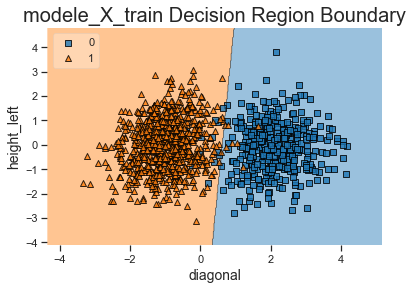

In [192]:
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions

clf = modele_X_train
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(X_train)
modele_svc = clf.fit(X_train2, y_train)
plot_decision_regions(X_train2, y_train.astype(np.int_), clf=clf, legend=2)

plt.xlabel(pd.DataFrame(X).columns[0], size=14)
plt.ylabel(pd.DataFrame(X).columns[1], size=14)
plt.title('modele_X_train Decision Region Boundary', size=20)

Text(0.5, 1.0, 'modele_Xresampled Decision Region Boundary')

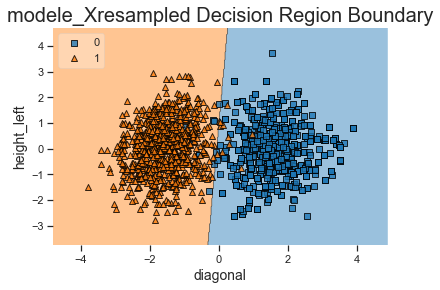

In [193]:
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions

clf = modele_Xresampled
pca = PCA(n_components = 2)
Xresampled2 = pca.fit_transform(Xresampled)
modele_svc = clf.fit(Xresampled2, yresampled)
plot_decision_regions(Xresampled2, yresampled.astype(np.int_), clf=clf, legend=2)

plt.xlabel(pd.DataFrame(X).columns[0], size=14)
plt.ylabel(pd.DataFrame(X).columns[1], size=14)
plt.title('modele_Xresampled Decision Region Boundary', size=20)

3-fold cross validation:

f1: 0.98710 (+/- 0.00) [modele_X_train]

f1: 0.98456 (+/- 0.00) [modele_X_train_grid]

f1: 0.98708 (+/- 0.00) [model_Threshold_X_train]

f1: 0.98522 (+/- 0.00) [Bagging_model_X_train]



Text(0.5, 1.0, 'Decision Region Boundary')

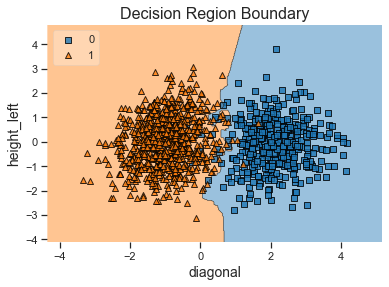

In [214]:
from sklearn import model_selection
from mlxtend.classifier import StackingClassifier
import numpy as np
import warnings

warnings.simplefilter('ignore')


lr = LogisticRegression()
sclf = StackingClassifier(classifiers=[modele_1, modele_3,modele_5,modele_7], 
                          meta_classifier=lr)

print('3-fold cross validation:\n')

for clf, label in zip([modele_1, modele_3,modele_5,modele_7], 
                      ['modele_X_train', 
                       'modele_X_train_grid',
                      'model_Threshold_X_train',
                       'Bagging_model_X_train'
                      ]):
    clf.fit(X_train2, y_train)

    scores = model_selection.cross_val_score(clf, X_train2, y_train, 
                                              cv=3, scoring='f1')
    
    print("f1: %0.5f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))
    
    print("")
    
clf.fit(X_train2, y_train)
plot_decision_regions(X_train2, y_train.astype(np.int_), clf=clf, legend=2)

plt.xlabel(pd.DataFrame(X).columns[0], size=14)
plt.ylabel(pd.DataFrame(X).columns[1], size=14)
plt.title('Decision Region Boundary', size=16)

3-fold cross validation:

f1: 0.99129 (+/- 0.00) [modele_Xresampled]

f1: 0.99069 (+/- 0.01) [model_Xresampled_grid]

f1: 0.99129 (+/- 0.00) [model_Threshold_Xresampled]

f1: 0.98941 (+/- 0.00) [Bagging_model_Xresampled]



Text(0.5, 1.0, 'Decision Region Boundary')

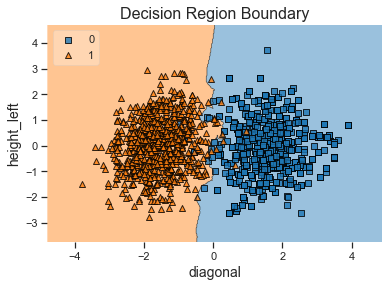

In [213]:
from sklearn import model_selection
from mlxtend.classifier import StackingClassifier
import numpy as np
import warnings

warnings.simplefilter('ignore')


lr = LogisticRegression()
sclf = StackingClassifier(classifiers=[modele_2, modele_4,modele_6,modele_8], 
                          meta_classifier=lr)

print('3-fold cross validation:\n')

for clf, label in zip([ modele_2, modele_4,modele_6,modele_8], 
                      ['modele_Xresampled',
                       'model_Xresampled_grid',
                       'model_Threshold_Xresampled',
                       'Bagging_model_Xresampled'
                      ]):

    scores = model_selection.cross_val_score(clf, Xresampled, yresampled, 
                                              cv=3, scoring='f1')
    
    print("f1: %0.5f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))
    
    print("")
    
clf.fit(np.array(Xresampled2), np.array(yresampled).astype(int))
plot_decision_regions(np.array(Xresampled2), np.array(yresampled).astype(int), clf=clf, legend=2)

plt.xlabel(pd.DataFrame(X).columns[0], size=14)
plt.ylabel(pd.DataFrame(X).columns[1], size=14)
plt.title('Decision Region Boundary', size=16)  
    

In [196]:
from sklearn.svm import LinearSVC


class NaivelyCalibratedLinearSVC(LinearSVC):
    """LinearSVC with `predict_proba` method that naively scales
    `decision_function` output."""

    def fit(self, X, y):
        super().fit(X, y)
        df = self.decision_function(X)
        self.df_min_ = df.min()
        self.df_max_ = df.max()

    def predict_proba(self, X):
        """Min-max scale output of `decision_function` to [0,1]."""
        df = self.decision_function(X)
        calibrated_df = (df - self.df_min_) / (self.df_max_ - self.df_min_)
        proba_pos_class = np.clip(calibrated_df, 0, 1)
        proba_neg_class = 1 - proba_pos_class
        proba = np.c_[proba_neg_class, proba_pos_class]
        return proba

In [197]:
modele_1 = modele_X_train
modele_3 = modele_X_train_grid
modele_5 = modele_X_train_threshold 
modele_7 = Bagging_model_X_train



modele_2 = modele_Xresampled 
modele_4 = model_Xresampled_grid
modele_6 = model_Threshold_Xresampled
modele_8 = Bagging_model_Xresampled

In [198]:
sclf = StackingClassifier(classifiers=[modele_1, modele_3, modele_5, modele_7], 
                          meta_classifier=lr)



In [199]:
from sklearn.calibration import CalibrationDisplay
clf_list = [
    (modele_X_train, "modele_X_train"),
    (modele_X_train_grid, "modele_X_train_grid"),
    (modele_X_train_threshold, "modele_X_train_threshold"),

]

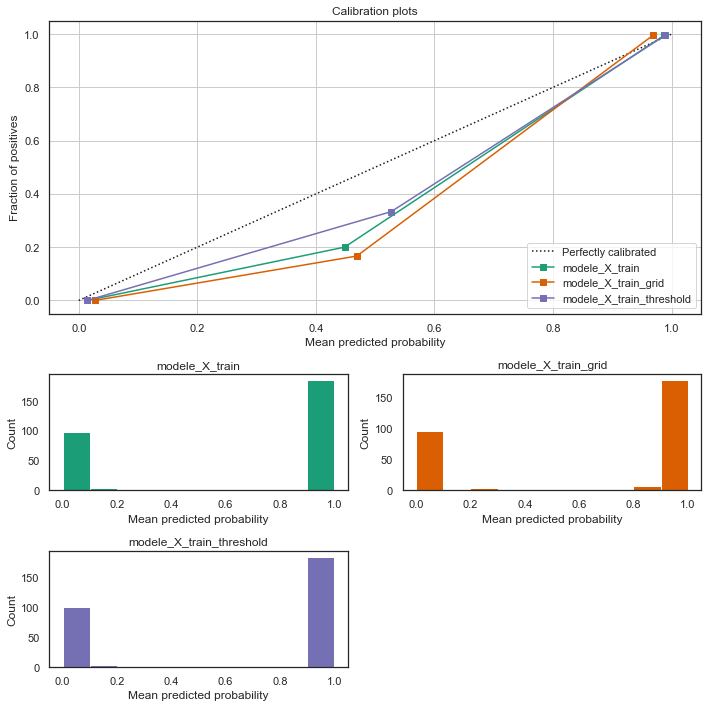

In [200]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(10, 10))
gs = GridSpec(4, 2)
colors = plt.cm.get_cmap("Dark2")

ax_calibration_curve = fig.add_subplot(gs[:2, :2])
calibration_displays = {}
for i, (clf, name) in enumerate(clf_list):
    clf.fit(X_train, y_train)
    display = CalibrationDisplay.from_estimator(
        clf,
        X_test,
        y_test,
        n_bins=3,
        name=name,
        ax=ax_calibration_curve,
        color=colors(i),
    )
    calibration_displays[name] = display

ax_calibration_curve.grid()
ax_calibration_curve.set_title("Calibration plots")

# Add histogram
grid_positions = [(2, 0), (2, 1), (3, 0), (3, 1)]
for i, (_, name) in enumerate(clf_list):
    row, col = grid_positions[i]
    ax = fig.add_subplot(gs[row, col])

    ax.hist(
        calibration_displays[name].y_prob,
        range=(0, 1),
        bins=10,
        label=name,
        color=colors(i),
    )
    ax.set(title=name, xlabel="Mean predicted probability", ylabel="Count")

plt.tight_layout()
plt.show()


In [201]:
from sklearn.calibration import CalibrationDisplay
clf_list = [
    (modele_Xresampled, "modele_Xresampled"),
    (model_Xresampled_grid, "modele_Xresampled_grid"), 
    (model_Threshold_Xresampled, "model_Threshold_Xresampled"),

]

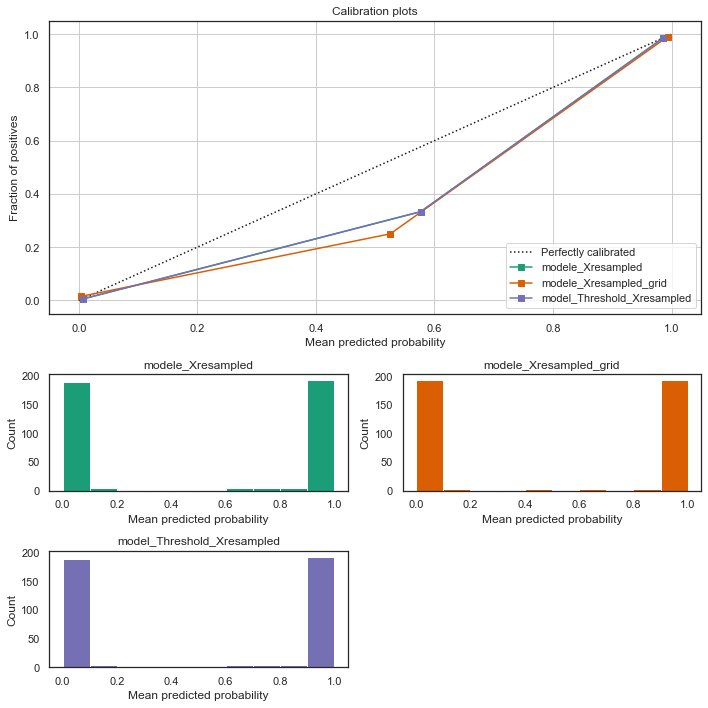

In [202]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(10, 10))
gs = GridSpec(4, 2)
colors = plt.cm.get_cmap("Dark2")

ax_calibration_curve = fig.add_subplot(gs[:2, :2])
calibration_displays = {}
for i, (clf, name) in enumerate(clf_list):
    clf.fit(Xresampled, yresampled)
    display = CalibrationDisplay.from_estimator(
        clf,
        X_test_resampled,
        y_test_resampled,
        n_bins=3,
        name=name,
        ax=ax_calibration_curve,
        color=colors(i),
    )
    calibration_displays[name] = display

ax_calibration_curve.grid()
ax_calibration_curve.set_title("Calibration plots")

# Add histogram
grid_positions = [(2, 0), (2, 1), (3, 0), (3, 1)]
for i, (_, name) in enumerate(clf_list):
    row, col = grid_positions[i]
    ax = fig.add_subplot(gs[row, col])

    ax.hist(
        calibration_displays[name].y_prob,
        range=(0, 1),
        bins=10,
        label=name,
        color=colors(i),
    )
    ax.set(title=name, xlabel="Mean predicted probability", ylabel="Count")

plt.tight_layout()
plt.show()
